<a href="https://colab.research.google.com/github/9105507/MINERIA_DE_DATOS_23_24/blob/main/LAB01_Preprocesamiento_y_visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 1 - Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Joaquín Vilaplana

Adrián García-Arroba

# Inicialización

Librerías usadas:

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random

# Práctica 1 (Vacunación COVID)
Valor (2,5 puntos)

A finales de 2020 empezó la vacunación del COVID-19 que ha producido la mayor pandemia mundial que se
recuerda. Algunos países en vista de los problemas que puedan causar futuras pandemias quieren saber
qué país está llevando el plan de vacunación más eficiente. En España, el Centro de Biología Molecular
Severo Ochoa donde participa la Doctora Margarita del Val. Para ello vamos a obtener cual es la evolución
del número de vacunados en el tiempo usando el set de datos vacunaciones.csv.

1.- (1,5 puntos) Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.

2.- (1 punto) De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo (no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.

## 1.- (1,5 puntos)

Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Especifica la ruta de tu archivo CSV
archivo_csv = 'vacunaciones.csv'

# Carga el archivo CSV en un DataFrame
data = pd.read_csv(archivo_csv)


Visualizamos los datos, para ver las instancias que tiene cada dato.

In [ ]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
print('El número de instancias para cada datos es de:',len(data.columns))
print('Las instancias son:')
for i in range(0,len(data.columns)):
  print(data.columns[i])

El número de instancias para cada datos es de: 15
Las instancias son:
country
iso_code
date
total_vaccinations
people_vaccinated
people_fully_vaccinated
daily_vaccinations_raw
daily_vaccinations
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
daily_vaccinations_per_million
vaccines
source_name
source_website


El número de datos regristrados es de:

In [ ]:
ndata = len(data)
print(ndata)

3208


Contemos cuántos NaN hay en la columna de “people vaccinated”, si los hay.

In [ ]:
num = data['people_vaccinated'].isna().sum()
print(num)

1481


En el inicio de la memoria se han previsualizado los datos de la base de datos, ésta se estructura según países y en cada país mide en un intervalo de tiempo diario diferentes características sobre la vacunación en el mismo. Primero se analiza la proporción que hay de registros en cada países con respecto los rtegistros totalers para comrpobar si el número de registros para cada país está equilibrado. Por último, analizamos cuál es la proporción de Nan en cada país con respecto a las instancias totales de cada país en la columna de 'people vaccinated'.

In [ ]:
# Número de países registrados en la base de datos.

paises = data['country'].nunique()

print('La cantidad de países distintos registrados en el dataframe es de:', paises)

La cantidad de países distintos registrados en el dataframe es de: 90


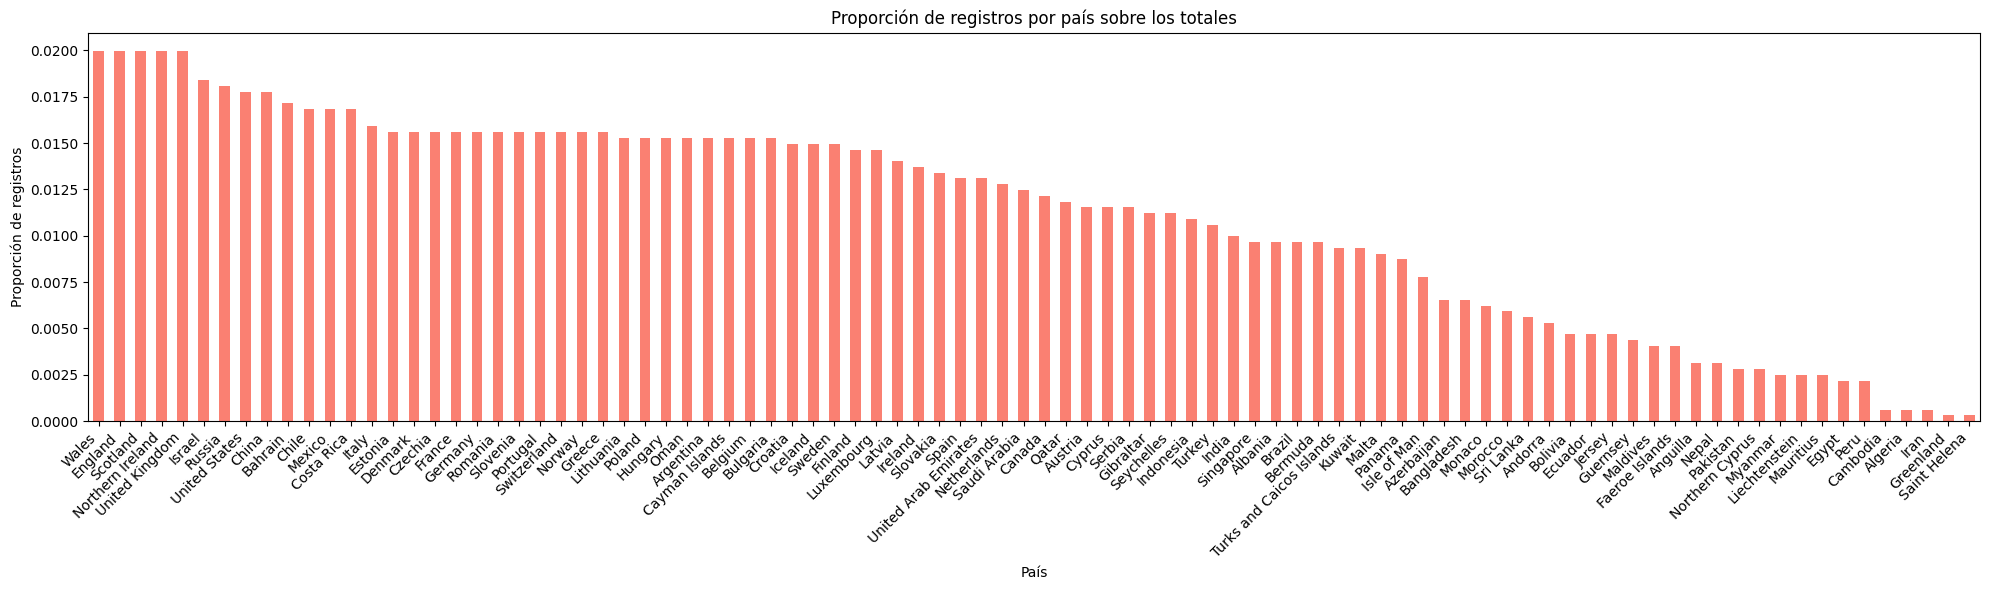

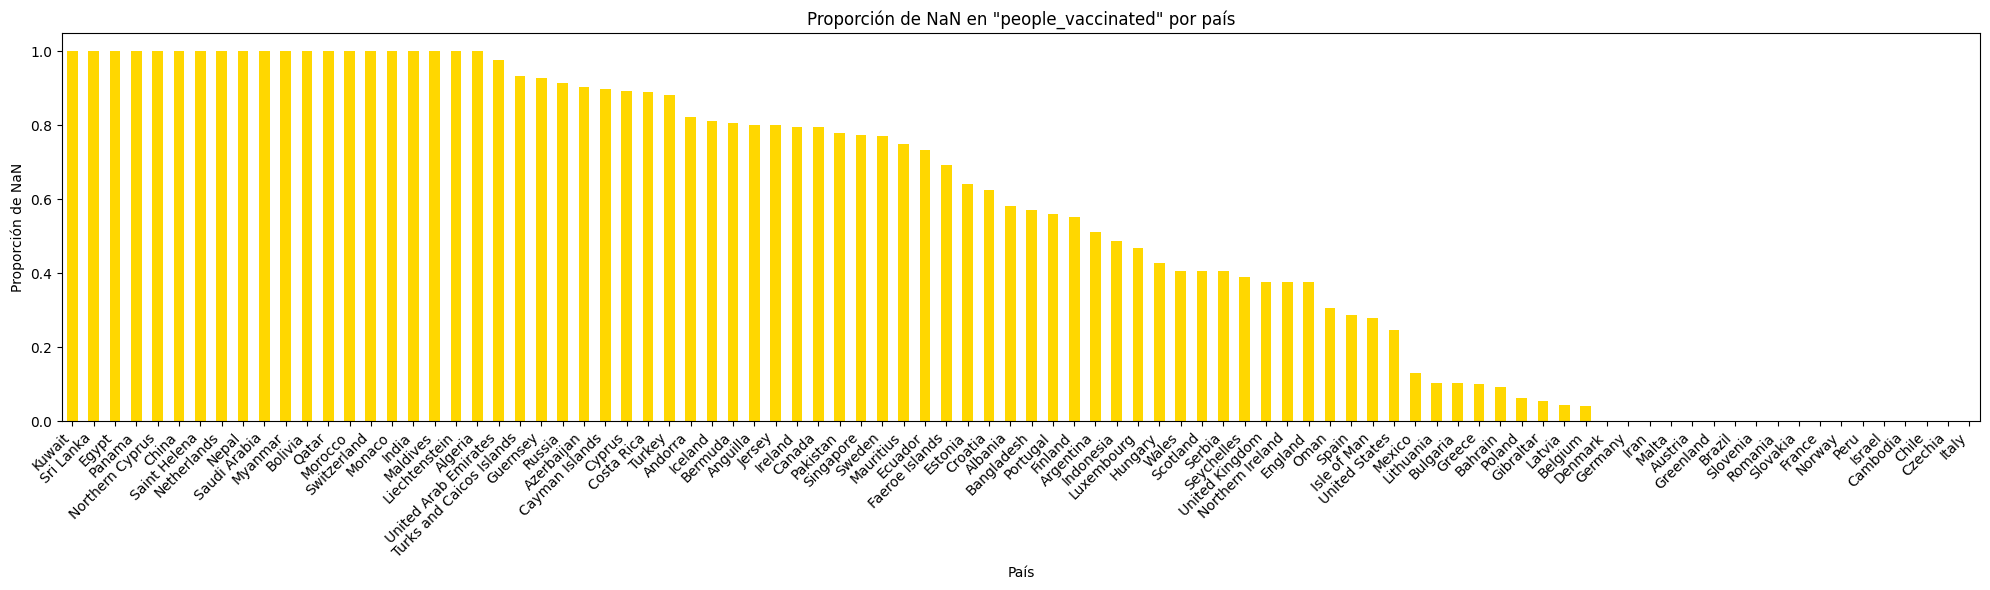

In [ ]:
# Calcular la proporción de registros por país con respecto a todos los
# registros del dataframe.

pais = data['country'].value_counts(normalize=True)

# Crear gráfico de barras
plt.figure(figsize=(20, 6))
pais.plot(kind='bar', color='salmon')
plt.title('Proporción de registros por país sobre los totales')
plt.xlabel('País')
plt.ylabel('Proporción de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calcular la proporción de NaN por país
nanp = data.groupby('country')['people_vaccinated'].apply(lambda x: x.isna().mean())
nanp = nanp.sort_values(ascending=False)
# Crear gráfico de barras
plt.figure(figsize=(20, 6))
nanp.plot(kind='bar', color='gold')
plt.title('Proporción de NaN en "people_vaccinated" por país')
plt.xlabel('País')
plt.ylabel('Proporción de NaN')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En la primera gráfica se puede apreciar que los registros de vacunación por país no están equilibrados con respecto a los demás países, los países con más registros son Gales, Inglaterra, Escocia, Irlanda del norte y Reino Unido; curiosamente, los países pertenecientes a las islas británicas menos Irlanda. Además, estos países presentan una tasa de Nan de menos del 60%.

En la segunda gráficas se encuentran númerosos países que presenten una proporción de Nan del 100%, unos 20 países que presentan esta problemática. A partir de estos, los demás países van disminuyendo su tasa de Nan progresivamente hasta llegar a 0%, en 18 países.

El problema que se encuentra es que en algunos países hay una gran concentración de "missing values" en la columna de 'people_vaccinated' que no nos permiten estimar de forma significativa los valores de esas instancias vacías, ya que la mayoría están vacías, no hay datos suficientes.

Por tanto, tenemos dos opciones en esos casos extremos, la primera, y más sencilla, descartar esos países por falta de datos, siendo más recomendable cuando no es posible estimar con claridad un posible valor; y la segunda, consiste en tratar de estimar un posible valor en función de los datos que conocemos.

De los datos que conocemos hay dos variables que determinan 'people_vaccinated', éstas son, 'total_vaccinations' y 'people_fully_vaccinated'. La ecuación con la que se relación entre sí es esta:
'total_vaccinations' = 'people_vaccinated' + 'people_fully_vaccinated'
Para corroborar nuestra hipótesis comprobamos en aquellos casos donde estas tres variables tengan valores asignados si esta ecuación se cumple o no. Para ello utilizamos el siguiente código.
de "missing values" en la columna 'daily_vaccinations' de esos países.

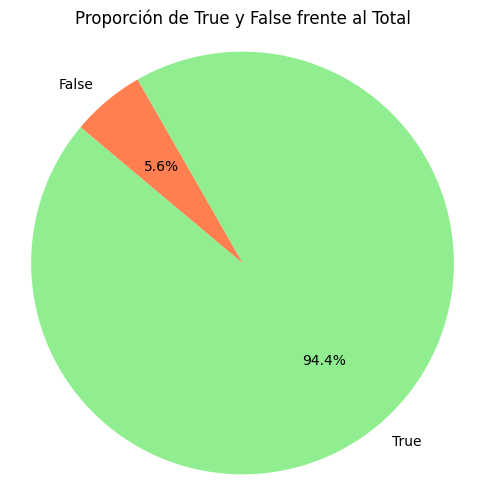

El número de instancias que se han podido calcular es de: 1087


In [ ]:
# Iteramos sobre cada fila del DataFrame
resultados = [] # Guardar resultados.

for index, row in data.iterrows():

  # Verificamos si algún valor es NaN en la fila actual.
  if pd.isna(row[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']]).any():
    # Si hay NaN, no realizamos la comprobación para esta fila.
    pass
  else:
    # Si no hay NaN, comprobamos la ecuación A = B + C.
    if row['total_vaccinations'] == row['people_vaccinated'] + row['people_fully_vaccinated']:
        resultados.append(True)
    else:
        resultados.append(False)

conttrue = resultados.count(True)
contfalse = resultados.count(False)

# Creamos una lista con los conteos.
conteos = [conttrue, contfalse]

# Etiquetas para la gráfica.
etiquetas = ['True', 'False']

# Colores para la gráfica.
colores = ['lightgreen', 'coral']

# Creamos la gráfica de tarta.
plt.figure(figsize=(6, 6))
plt.pie(conteos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de True y False frente al Total')
plt.axis('equal')  # Hace que la gráfica sea un círculo en lugar de elipse.
plt.show()
print('El número de instancias que se han podido calcular es de:',len(resultados))

Efectivamente, la hipótesis sobre la ecuación mostrada anteriormente la damos como cierta ya que se cumple en más del 94% de ocasiones, sindo el número de ocasiones totales 1087.

Por tanto, en los casos en que hayan pocos Nan en un País y se pueden deducir a partir de valores anteriores, se utilizará el método explicado en el enunciado, en caso contrario, se utilizará, si se puediera, la hipótesis expuesta. En caso de que el primer valor de un país sea Nan y se puediera deducir con la hipótesis se utilizará , sino, se igualará a cero.

En caso de no tener valores para poder utilizar la hipótesis y muchos Nan en 'people_vaccinated' para un país, se tendrá que prescindir de él por falta de datos.

A continuación se procede a analizar que países pueden tener esta problematica.
Para ello se escogen aquellos países que superen al 60% en proporción de "missing values" en 'people_vaccinated', esta tasa de Nan se considera alta, y se analizará la proporción de "missing values" de las otras dos variables utilizadas en la hipótesis.

In [ ]:
# Países que superan el 60% de missing values en 'people_vaccinated'.
paises60 = nanp[nanp > 0.6].index.tolist()

print('Los países en los que en la variable "people_vaccinated" superan el 60% de proporción de Nan son:',paises60)
print('Un total de',len(paises60),'países.\n')

Los países en los que en la variable "people_vaccinated" superan el 60% de proporción de Nan son: ['Kuwait', 'Sri Lanka', 'Egypt', 'Panama', 'Northern Cyprus', 'China', 'Saint Helena', 'Netherlands', 'Nepal', 'Saudi Arabia', 'Myanmar', 'Bolivia', 'Qatar', 'Morocco', 'Switzerland', 'Monaco', 'India', 'Maldives', 'Liechtenstein', 'Algeria', 'United Arab Emirates', 'Turks and Caicos Islands', 'Guernsey', 'Russia', 'Azerbaijan', 'Cayman Islands', 'Cyprus', 'Costa Rica', 'Turkey', 'Andorra', 'Iceland', 'Bermuda', 'Anguilla', 'Jersey', 'Ireland', 'Canada', 'Pakistan', 'Singapore', 'Sweden', 'Mauritius', 'Ecuador', 'Faeroe Islands', 'Estonia', 'Croatia']
Un total de 44 países.



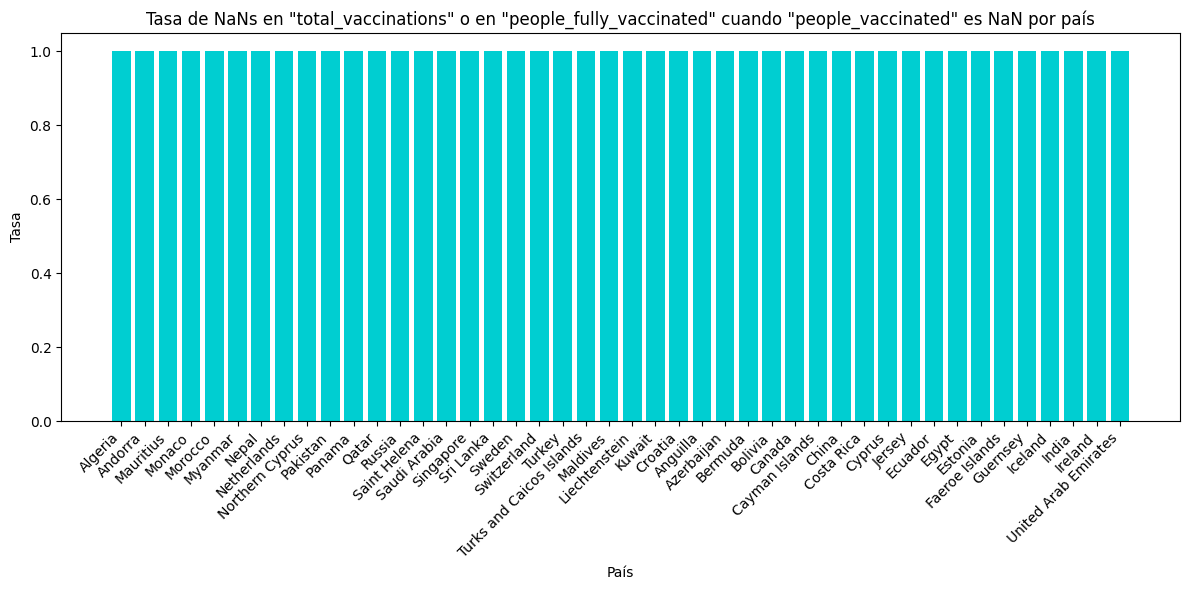

In [ ]:
# Sa calcula la proporción de Nan en las otras dos variables que tendríamos que
# utilizar para poder calcular 'people_vaccinated cuando ésta sea Nan. Lo que
# contará es si cuando hay Nan en 'people_vaccinated' lo hay también en las
# otras dos o en una de ellas ya que con que tan solo hay Nan en una de ellas
# ya no se puede realizar el cálculo.

# Proporción de Nan frente a que no haya Nan en las dos variables siempre
# teniendo en cuenta que 'people_vaccinated' se Nan ya que si no lo fuera no
# harían falta las dos variables.
d60 = data[data['country'].isin(paises60)]

def tasas(x):
      # Función que calcula la tasa de Nan en una o las dos variables cuando
    # 'people_vaccinated' es Nan frente a la cantidad de 'people_vaccinated' que
    # son Nan. Hay que tener en cuenta que en este caso pueden haber países
    # que no tengan ningún Nan en 'people_vaccinated'.

    tasa = x[x['people_vaccinated'].isna() & (x['total_vaccinations'].isna() | x['people_fully_vaccinated'].isna())].shape[0]

    if  len(x[x['people_vaccinated'].isna()]) == 0:
      return np.nan

    else:
     tasa = tasa / len(x[x['people_vaccinated'].isna()])
     return tasa

# Agrupamos en países, en cada uno calculamos sus tasas respectivas.
d61 = d60.groupby('country').apply(tasas)

# Ordenar los países por la tasa para una visualización más clara.
d61s = d61.sort_values(ascending=False)

# Generar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(d61s.index, d61s, color='darkturquoise')
plt.xlabel('País')
plt.ylabel('Tasa')
plt.title('Tasa de NaNs en "total_vaccinations" o en "people_fully_vaccinated" cuando "people_vaccinated" es NaN por país')
# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45,ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Resulta que de aquellos países que superan el 60% de Nan en 'people_vaccinated', todos tienen un 100% de Nan en alguna de las otras dos variables cuando 'people_vaccinated' es Nan, por tanto, no se puede calcular con exactitud los valores que la ocupan.

Por falta de datos y sus posibles cálculos, los países no se deben tener en cuenta, no hay datos significativos como para poder rellenar los huecos que faltan.

Los países que se eliminan del estudio son los siguientes.

In [ ]:
# Lista de países a eliminar.
eliminar = d61s.index.tolist()
print('Lo spaíses a eliminar son:',eliminar)
print('Se eliminan:',len(eliminar),'países.\n')

# Eliminamos los países del dataframe y reseteamos el índice.
data = data[~data['country'].isin(eliminar)].copy()
data.reset_index(drop=True, inplace=True)

Lo spaíses a eliminar son: ['Algeria', 'Andorra', 'Mauritius', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'Northern Cyprus', 'Pakistan', 'Panama', 'Qatar', 'Russia', 'Saint Helena', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'Turks and Caicos Islands', 'Maldives', 'Liechtenstein', 'Kuwait', 'Croatia', 'Anguilla', 'Azerbaijan', 'Bermuda', 'Bolivia', 'Canada', 'Cayman Islands', 'China', 'Costa Rica', 'Cyprus', 'Jersey', 'Ecuador', 'Egypt', 'Estonia', 'Faeroe Islands', 'Guernsey', 'Iceland', 'India', 'Ireland', 'United Arab Emirates']
Se eliminan: 44 países.



In [ ]:
# Se comprueba que se hayan eliminado los países.
paises = data['country'].nunique()
print(paises)

46


Efectivamente, se eliminaron los países ya que antes habían registros de 90 y ahora 46 = 90 - 44.

Lo que haremos con los demás países será utilizar la hipótesis primero ,cuando sea posible, para rellenar de forma exacta los huecos, y para los restantes, usaremos el método del enunciado.

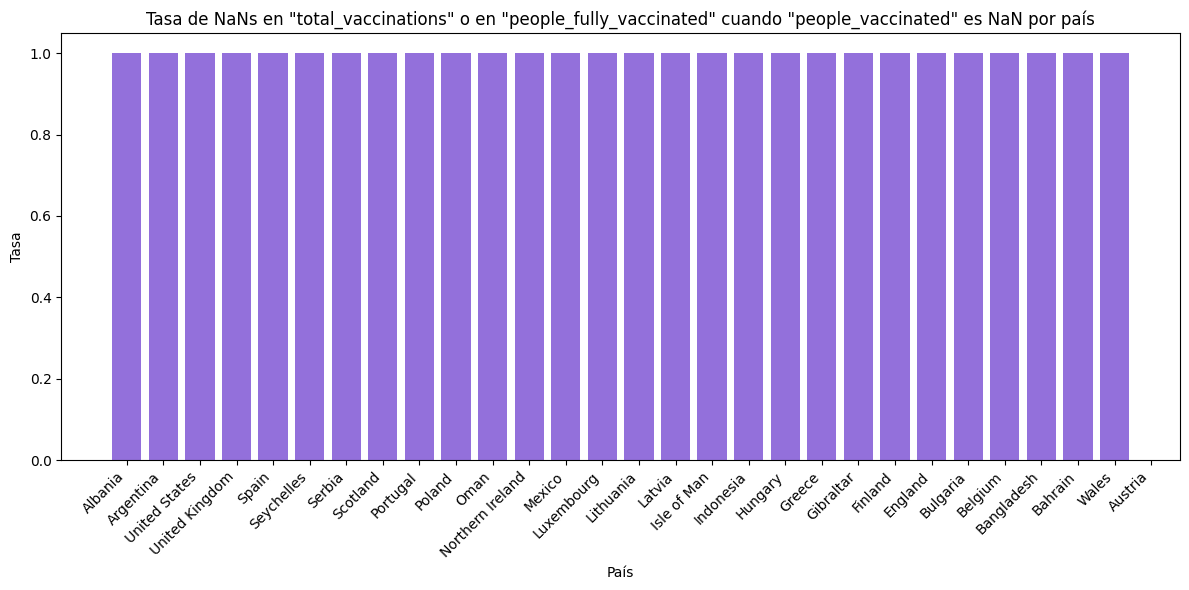

In [ ]:
# Sa calcula la proporción de Nan en las otras dos variables que tendríamos que
# utilizar para poder calcular 'people_vaccinated cuando ésta sea Nan. Lo que
# contará es si cuando hay Nan en 'people_vaccinated' lo hay también en las
# otras dos o en una de ellas ya que con que tan solo hay Nan en una de ellas
# ya no se puede realizar el cálculo.

# Proporción de Nan frente a que no haya Nan en las dos variables siempre
# teniendo en cuenta que 'people_vaccinated' se Nan ya que si no lo fuera no
# harían falta las dos variables.

# Llamamos a la función tasas, creada anteriormente, y calculamos en cada uno de
# los países respectivamente.

d61 = data.groupby('country').apply(tasas)
plt.figure(figsize=(12, 6))

# Ordenar los países por la tasa para visualización más clara.
d61s = d61.sort_values(ascending=False)

# Generar el gráfico de barras
plt.bar(d61s.index, d61s, color='mediumpurple')
plt.xlabel('País')
plt.ylabel('Tasa')
plt.title('Tasa de NaNs en "total_vaccinations" o en "people_fully_vaccinated" cuando "people_vaccinated" es NaN por país')
# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45,ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

La anterior gráfica nos dice que siempre que 'people_vaccinated' contenga Nan, las otras dos variables que podríamos utilizar para poder calcular la variable objetivo contendrán un Nan, las dos o una de ellas. En el caso de Autria, al no tener ningún Nan en la variable objetivo cuenta como 0%.

Por tanto, no podremos hacer uso en ningún caso de la hipótesis inicial.

Se procede a utilizar el método del enunciado.

In [ ]:
# Procedemos a copiar el dataframe en el caso que tengamos que utilizar el original.
data1 = data.copy()

# Método 1.

# Iterar sobre las filas del DataFrame
for i, fil in data.iterrows():

  # Verificar si 'people_vaccinated' es NaN.
  if pd.isna(fil['people_vaccinated']):

      # Verificar si el país es el mismo que el de la fila anterior
      if data.loc[max(0,i - 1), 'country'] == fil['country']:

        for j in range(3,0,-1):
          # Comprueba que las filas anteriores pertenezcan al mismo país.
          if (data.loc[(i - j)%len(data), 'country'] == fil['country']):

            lrow = data.iloc[(i - j):i, :]
            # Hace la media de 'people_vaccinated' de las filas anteriores.
            meanpv = lrow['people_vaccinated'].mean()
            data.at[i, 'people_vaccinated'] = meanpv
            break

      else:
        # Si no hay valores anteriores se iguala a cero.
        data.at[i, 'people_vaccinated'] = 0

# Comprobación.
print(data['people_vaccinated'].isna().any())

False


Una vez terminado el código se comprueba que no hayan Nans en la columna objetivo y, efectivamente, no los hay.

El problema que tiene este método expuesto en el enunciado es que, la variable que estudia la gente vacunada es una variable acumulativa, es decir, si en un día tienes un número de vacunados, al siguiente tienes que tener, por lo menos ese número.

Por este motivo, vamos a realizar otro tipo de método que puede aproximarse mejor a la realidad y luego veremos en el diagrama que haremos para los 5 países con mayores registros las diferencias.

La siguiente aproximación se basa en, cuando haya un Nan en 'people_vaccinated', calcular la media entre el valor del dia anterior y el valor siguiente que no sea Nan, de esta forma nos evitamos el problema de que al día siguiente tenga menos vacunados que el día anterior. En el caso de que no haya día anterior, se iguala la variable objetivo al valor del próximo día que no sea Nan.

En el caso extremo en el que nos encontremos en el primer día con Nan y no haya ningún próximo día que no sea Nan, la variable se iguala a cero.

In [ ]:
# Método 2.

# Definir función para manejar NaN.
def manejar_nan_por_pais(group):

    # Iterar sobre las filas del grupo
    for ind, fil in group.iterrows():

        if pd.isna(fil['people_vaccinated']) and ind > 0:
            # Encontrar el siguiente valor no NaN hacia adelante.
            nind = ind + 1
            while nind < len(group) and pd.isna(group.loc[nind, 'people_vaccinated']):
                nind += 1

            if nind < len(group):
                # Sustituir el NaN por la media del siguiente valor no NaN hacia
                # adelante y el valor anterior.
                vad = group.loc[nind, 'people_vaccinated']
                vaa = group.loc[ind-1, 'people_vaccinated']
                group.at[ind, 'people_vaccinated'] = (vaa+vad)/2
            else:
                group.at[ind, 'people_vaccinated'] = 0  # Establecer como cero si no hay valores no NaN después.

        elif pd.isna(fil['people_vaccinated']):
            # Encontrar el siguiente valor no NaN hacia adelante.
            nind = ind + 1
            while nind < len(group) and pd.isna(group.loc[nind, 'people_vaccinated']):
                nind += 1

            if nind < len(group):
                # Sustituir el NaN por el siguiente valor no NaN hacia adelante.
                vad = group.loc[nind, 'people_vaccinated']
                group.at[ind, 'people_vaccinated'] = vad

            else:
                group.at[ind, 'people_vaccinated'] = 0  # Establecer como cero si no hay valores no NaN después.

    return group

def reset(g):
    # Restablecer el índice dentro de cada grupo.
    g = g.reset_index(drop=True)
    return g

# Se resetea el índice para que cada grupo tenga el suyo propio.
data1 = data1.groupby('country', group_keys=False).apply(reset)

# Aplicar la función a cada grupo (por país).
data1 = data1.groupby('country', group_keys=False).apply(manejar_nan_por_pais)

# Se resetea el índice para tener uno general.
data1.apply(reset)

# Comprobación.
print(data1['people_vaccinated'].isna().any())

False


Se comprueba que en la columna 'people_vaccinated' no existe ningún Nan.


## 2.- (1 punto)
De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo (no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.

Se procede, a continuación, con el segundo apartado del problema. Vimos que los 5 países con más registros eran,  Gales, Inglaterra, Escocia, Irlanda del norte y Reino Unido.

Se utilizará un diagrama de líneas acompañado de unos marcadores que indicarán el valor de 'people_vaccinated' de cada registro y, además, cada una de las cinco líneas tendrá un color diferente para diferenciar a los países representados.

Se cree esta es la mejor opción para representarlos ya que se hace sobre una variable independiente que es el tiempo y una variable discontinua que depende de él, 'people_vaccinated'.

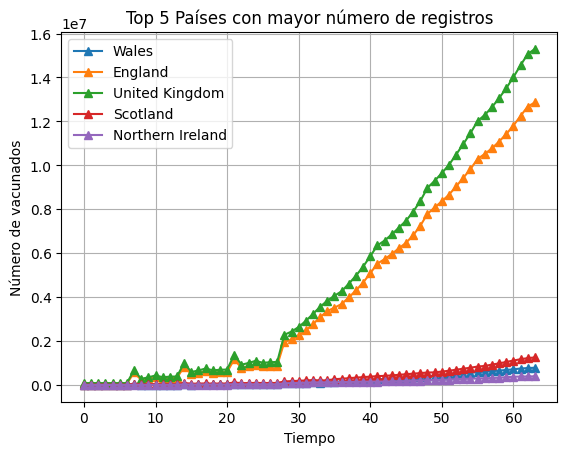

In [ ]:
rpais = data.groupby('country').size()

# Ordena los países por el número de registros en orden descendente
top5 = rpais.sort_values(ascending=False).head(5)

# Para cada país en los cinco primeros, crea un gráfico de línea
for pais in top5.index:
    datos_pais = data[data['country'] == pais]
    plt.plot(range(len(datos_pais)),datos_pais['people_vaccinated'], label=pais, marker = '^')

# Añade etiquetas y leyenda al gráfico
plt.xlabel('Tiempo')
plt.ylabel('Número de vacunados')
plt.title('Top 5 Países con mayor número de registros')
plt.legend()
plt.grid()
# Muestra el gráfico
plt.show()

El anterior diagrama muestra los datos utilizando el algoritmo expuesto en el enunciado para asignar un valor a cada Nan que se encuentre en la variable 'people_vaccinated'.

Son apreciables los picos en las gráficas de Inglaterra y Reino Unido, éstos corroboran la explicación dicha antes sobre el porque el algoritmo del enunciado no es un buen método de aproximación. La variable es acumulativa y esos picos demuestran una mala aproximación.

A continuación se van a graficar los datos aproximados por el segundo método.

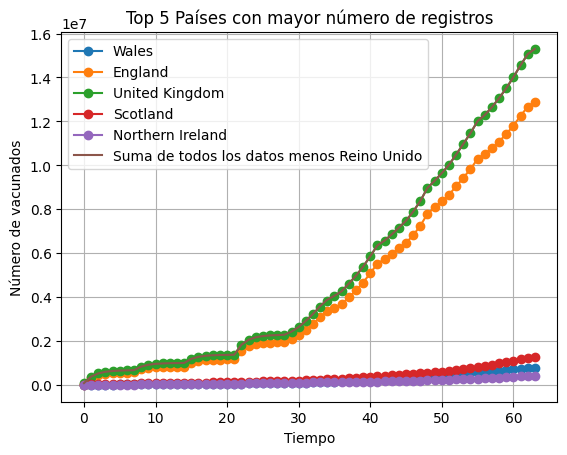

In [ ]:
rpais = data1.groupby('country').size()

# Ordena los países por el número de registros en orden descendente
top5 = rpais.sort_values(ascending=False).head(5)
suma = []
# Para cada país en los cinco primeros, crea un gráfico de línea
for pais in top5.index:
    datos_pais = data1[data1['country'] == pais]
    plt.plot(range(len(datos_pais)),datos_pais['people_vaccinated'], label=pais, marker = 'o')
    if pais != 'United Kingdom':
      # Se guardan los datos de los países exceptuando Reino Unido.
      suma.append(datos_pais['people_vaccinated'])

# Se suman todos los datos exceptuando Reino Unido.
suma = [sum(x) for x in zip(*suma)]
# Se grafica la suma.
plt.plot(range(len(datos_pais)),suma, label='Suma de todos los datos menos Reino Unido')

# Añade etiquetas y leyenda al gráfico
plt.xlabel('Tiempo')
plt.ylabel('Número de vacunados')
plt.title('Top 5 Países con mayor número de registros')
plt.legend()
plt.grid()
# Muestra el gráfico
plt.show()

Utilizando el segundo método es apreciable que ya no existen esos picos que se reflejaban en el diagrama anterior y, por tanto, las curvas son más suaves.

Consideramos que el segundo método es mejor que el propuesto en el enunciado.

Además, nos dimos cuenta de que los cuatro países, Inglaterra, Gales, Escocia e Irlanda del Norte, pertenecen a Reino Unido y pensamos que quizás los datos que se tenían de Reino Unido eran la suma de los datos que se tenía de sus países y para comprobarlo hicimos la suma de todos los registros de los cuatro países en sus días respectivos. Esta suma si se gráfica recae perfectamnte en los datos de Reino Unido afirmando nuestra hipótesis.

Centrándonos en la última pregunta del enunciado, se entiende que se refiere a cuál es el país más constante de estos cinco estudiados. Vamos a realizar un estudio sobre ello.

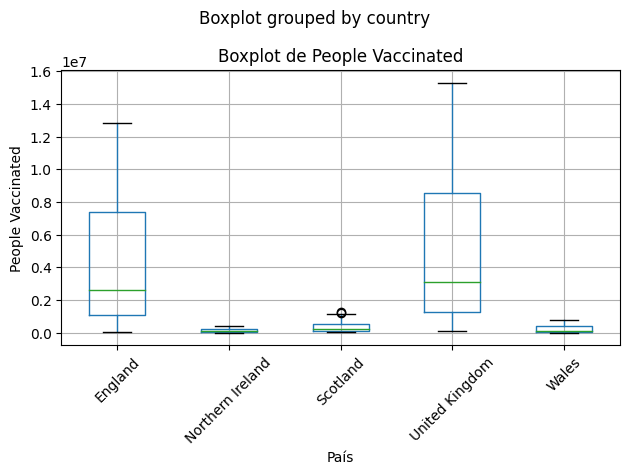

In [ ]:
# Filtrar el DataFrame para incluir solo los datos de los cinco países.
df_filtrado = data1[data1['country'].isin(top5.index)]

# Crear el gráfico de bigotes.
df_filtrado.boxplot(column='people_vaccinated', by='country')
plt.title('Boxplot de People Vaccinated')
plt.xlabel('País')
plt.ylabel('People Vaccinated')
plt.xticks(rotation=45)
plt.grid(True)
# Mostrar el gráfico.
plt.tight_layout()
plt.show()

En el anterior gráfico de bigotes se puede ver como, Irlanda del norte, Escocia y Gales tienen muy poca variabilidad con respecto Inglaterra y Reino Unido, ya que los bigotes están muy contraídos. Inglaterra es el país con más variabilidad junto con la nación de Reino Unido, ya que como se vió, ésta es la suma de las demás.

Pero para calcular el país más constante tendremos que tener encuenta las diferencias diarias en la variable acumulativa 'people_vaccinated' y de ésta calcular su desviación, aquel país con menor desviación en la vacunación diaria es el que ha vacunado de manera más constante.

In [ ]:
# Crear un DataFrame vacío para almacenar las diferencias
df_diferencias = pd.DataFrame(columns=['diferencia', 'country'])

# Obtener los países únicos del DataFrame
paises = df_filtrado['country'].unique()

# Función para calcular las diferencias y agregarlas al DataFrame
def agregar_diferencias(pais):
    df_pais = df_filtrado[df_filtrado['country'] == pais]
    diferencias = df_pais['people_vaccinated'].diff(1).fillna(0)
    df_nuevo = pd.DataFrame({'diferencia': diferencias, 'country': [pais]*len(diferencias)})
    return df_nuevo

# Aplicar la función a cada país y concatenar los resultados
for pais in paises:
    df_diferencias = pd.concat([df_diferencias, agregar_diferencias(pais)], ignore_index=True)

Se guardan las diferencias de la gente vacunada según el país en un dataframe que se representará acontinuación.

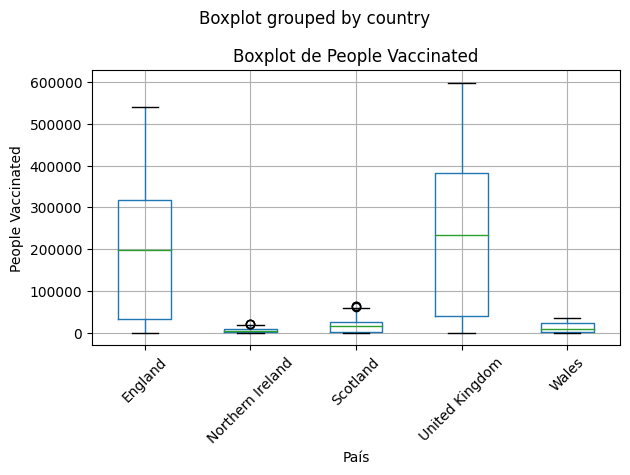

In [ ]:
# Crear el gráfico de bigotes.
df_diferencias.boxplot(column='diferencia', by='country')
plt.title('Boxplot de People Vaccinated')
plt.xlabel('País')
plt.ylabel('People Vaccinated')
plt.xticks(rotation=45)
plt.grid(True)
# Mostrar el gráfico.
plt.tight_layout()
plt.show()

Visualizando el gráfico de bigotes se aprecia que la variabilidad en las diferencias es muy alta, como en el anterior gráfico de bigotes que trataba la propia variable, en Inglaterra y Reino Unido. El país que menos desviación tiene tan solo viendo el gráfico es Irlanda del Norte.

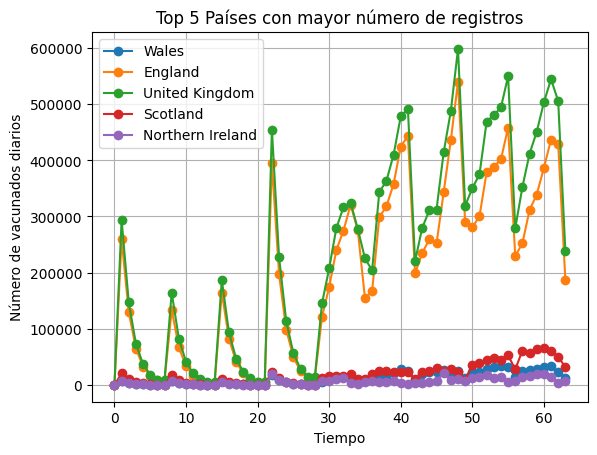

In [ ]:
for pais in top5.index:
    datos_pais = df_diferencias[df_diferencias['country'] == pais]
    plt.plot(range(len(datos_pais)),datos_pais['diferencia'], label=pais, marker = 'o')

# Añade etiquetas y leyenda al gráfico
plt.xlabel('Tiempo')
plt.ylabel('Número de vacunados diarios')
plt.title('Top 5 Países con mayor número de registros')
plt.legend()
plt.grid()
# Muestra el gráfico
plt.show()

Gráfico que muestra los vacunados diarios, las diferencias de la variable acumulativa de 'people_vaccinated', en los 5 países. Corrobora la explicación anterior sobre la gran variabilidad de Inglaterra y Reino Unido.


In [ ]:
# Calcular la desviación estándar por país
desviacion_std_por_pais = df_diferencias.groupby('country')['diferencia'].std()

print(desviacion_std_por_pais)

country
England             155786.143918
Northern Ireland      5758.364216
Scotland             18572.493808
United Kingdom      184768.479219
Wales                11088.611741
Name: diferencia, dtype: float64


Efectivamente, el país con menor desviación, es decir, con un número de vacunaciones diarias más constante es Irlanda del Norte con una desviación típica de 5758. No obstante, este resultado puede ser sesgado ya que la población, por ejemplo, en todo Reino Unido es mayor que la de Irlanda del Norte, claramente la variabilidad en Reino Unido es mayor por eso.

Creemos que para una mejor interpretación de la variabilidad habría que normalizar las diferencias a la mayor de ellas con respecto al país, de esta froma se tendría en cuenta a una misma escala cuál de estos su vacunación es constante.

In [ ]:
# Calcular el valor máximo de diferencia por país
max_dif = df_diferencias.groupby('country')['diferencia'].max()

# Función para normalizar los valores
def norm(row):
    pais = row['country']
    max = max_dif[pais]
    return row['diferencia'] / max

# Aplicar la normalización por país
df_diferencias['diferencia_normalizada'] = df_diferencias.apply(norm, axis=1)

Una vez ya escalados los valores procedemos a interpretarlos.

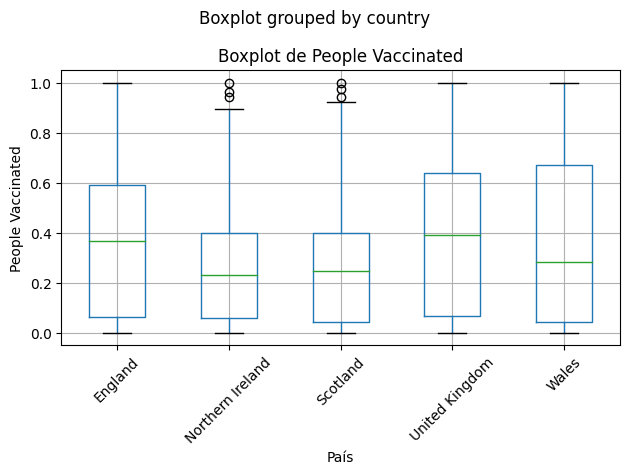

In [ ]:
# Crear el gráfico de bigotes.
df_diferencias.boxplot(column='diferencia_normalizada', by='country')
plt.title('Boxplot de People Vaccinated')
plt.xlabel('País')
plt.ylabel('People Vaccinated')
plt.xticks(rotation=45)
plt.grid(True)
# Mostrar el gráfico.
plt.tight_layout()
plt.show()

Ya escalabilizados los datos se puede hacer un estudio mucho más coherente y objetivo. Las diferencias ahora no son tan claras, Irlanda del Norte y Escocia son los países en los que se puede notar una ligera disminución en su desvación comparados con los otros tres.

In [ ]:
# Calcular la desviación estándar por país
desviacion_std_por_pais = df_diferencias.groupby('country')['diferencia_normalizada'].std()

print(desviacion_std_por_pais)

country
England             0.288658
Northern Ireland    0.276220
Scotland            0.286268
United Kingdom      0.308777
Wales               0.326568
Name: diferencia_normalizada, dtype: float64


Irlanda del Norte y Escocia son los dos países con menor desviación, es decir, con una tasa de vacunación diaria más constante.

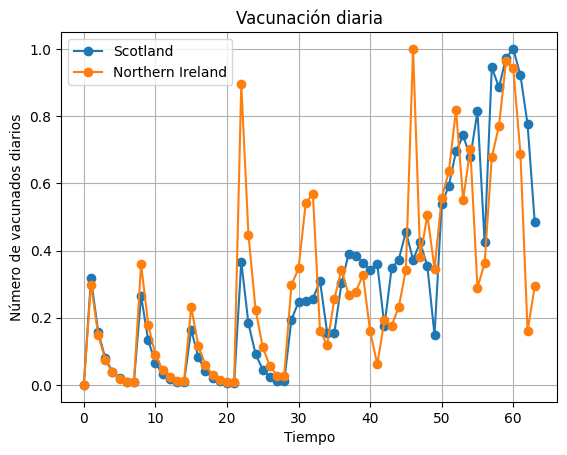

In [ ]:
for pais in top5.index:
  if pais == 'Scotland' or pais == 'Northern Ireland':
    datos_pais = df_diferencias[df_diferencias['country'] == pais]
    plt.plot(range(len(datos_pais)),datos_pais['diferencia_normalizada'], label=pais, marker = 'o')

# Añade etiquetas y leyenda al gráfico
plt.xlabel('Tiempo')
plt.ylabel('Número de vacunados diarios')
plt.title('Vacunación diaria')
plt.legend()
plt.grid()
# Muestra el gráfico
plt.show()

Comparando ambos países se aprecia que Irlanda del Norte tiene días en los que su tasa de vacunación explota mientras que Escocia es más constante y sigue una tendencia alcista. Por este motivo, se considera a Escocia como el país que mejor está llevando su plan de vacunación. Ya que sus números son constantes, no tiene días en los que haya una explosión muy grande, y con una tendencia alcista.

# Práctica 2 (Sensores atmosféricos)

Valor (3,5 puntos)
Se cuenta con los datos del año 2020 de distintas mediciones de un sensor medioambiental situado en el
campus de la Universidad Francisco de Vitoria. Para analizar la información recogida haremos uso de un
dataset proporcionado por la propia Universidad llamado “ozone”.

1.- (0,75 puntos) Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading, Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos obtenidos en cada caso.

2.- (0,75 puntos) Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y “Visibility”.

3.- (1 punto) Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan relacionar diferentes variables ¿Qué nos dicen los datos?

4.- (1 punto) Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.

En primer lugar, se carga la base de datos y se analiza y visualiza brevemente:

In [ ]:
# Especifica la ruta de tu archivo CSV
archivo_csv = 'ozone.csv'

# Carga el archivo CSV en un DataFrame
ozonedata = pd.read_csv(archivo_csv)
ozonedata.head()

Month,"Day_of_month","Day_of_week","ozone_reading","pressure_height","Wind_speed","Humidity","Temperature_Sandburg","Temperature_ElMonte","Inversion_base_height","Pressure_gradient","Inversion_temperature","Visibility"
1 5 1 5.34 5760 3 51 54 45.32 1450  25 57.02                                                 60                                                                                                                                                                         
  6 2 5.77 5720 4 69 35 49.64 1568  15 53.78                                                 60                                                                                                                                                                         
  7 3 3.69 5790 6 19 45 46.40 2631 -33 54.14                                                100                                                                                                                                                                         
  8 4 3.89 5790 3 25 55 52.70 554  -28 64.76                                                250                                                                                                                                                                         
  9 5 5.76 5700 3 73 41 48.02 2083  23 52.52                                                120

Se observa que hay un problema con el formato en el que viene el csv. Creemos que puede estar causado porque los títulos de las variables están guardados entre comillas dobles. Por esto, se ejecuta el siguiente código con el fin de arreglar el problema:

In [ ]:
with open('ozone.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    headers = next(reader)  # Leer solamente la primera fila
    # Leer todas las filas del archivo
    data = list(reader)

# Modificar los títulos de las columnas
for i in range(len(headers)):
    headers[i] = headers[i].replace('"', '')

# Escribir el archivo CSV modificado
with open('ozone_modificado.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(headers)
    writer = csv.writer(csvfile, delimiter=',')
    for row in data[1:]:  # Escribir las filas restantes desde la segunda fila
        writer.writerow(row)

In [ ]:
# Especifica la ruta de tu archivo CSV
archivo_csv = 'ozone_modificado.csv'

# Carga el archivo CSV en un DataFrame
ozonedata = pd.read_csv(archivo_csv)
ozonedata.head()

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
1,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
2,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
3,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120
4,1,12,1,6.39,5720,3,44,51,54.32,111,9,63.14,150


Se observa el tamaño de nuestro dataset:

In [ ]:
ozonedata.shape

(202, 13)

Nuestra base de datos se compone de 203 registros. Cada uno de ellos representa un día de un año (no se sabe qué año). Después de una breve investigación, se ha encontrado información sobre las variables de nuestra base de datos [[Fuente](https://github.com/mlesnoff/JchemoData.jl/blob/main/README.md)]:

*   **'Month'** --> variable discreta/categórica: 1 = Enero, ..., 12 = Diciembre.
*   **'Day_of_month'** --> variable discreta/categórica.
*   **'Day_of_week'** --> variable discreta/categórica: 1 = Lunes, ..., 7 = Domingo.
*   **'ozone_reading'** --> variable continua: Lectura de ozono máxima diaria del promedio de una hora.
*   **'pressure_height'** --> variable continua: Altura de presión de 500 milibares (m) medida en Vandenberg AFB.
*   **'Wind_speed'** --> variable continua (aparentemente discretizable): Velocidad del viento (mph) en el Aeropuerto Internacional de Los Ángeles (LAX).
*   **'Humidity'** --> variable continua: Humedad (%) en LAX.
*   **'Temperature_Sandburg'** --> variable continua: Temperatura (grados F) medida en Sandburg, CA.
*   **'Temperature_ElMonte'** --> variable continua: Temperatura (grados F) medida en El Monte, CA.
*   **'Inversion_base_height'** --> variable continua: Altura de la base de inversión (pies) en LAX.
*   **'Pressure_gradient'** --> variable continua: Gradiente de presión (mm Hg) de LAX a Daggett, CA.
*   **'Inversion_temperature'** --> variable continua: Temperatura base de inversión (grados F) en LAX.
*   'Visibility' --> variable continua: Visibilidad (millas) medida en LAX.

Veamos más información de nuestro dataset:

In [ ]:
ozonedata.columns

Index(['Month', 'Day_of_month', 'Day_of_week', 'ozone_reading',
       'pressure_height', 'Wind_speed', 'Humidity', 'Temperature_Sandburg',
       'Temperature_ElMonte', 'Inversion_base_height', 'Pressure_gradient',
       'Inversion_temperature', 'Visibility'],
      dtype='object')

In [ ]:
ozonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  202 non-null    int64  
 1   Day_of_month           202 non-null    int64  
 2   Day_of_week            202 non-null    int64  
 3   ozone_reading          202 non-null    float64
 4   pressure_height        202 non-null    int64  
 5   Wind_speed             202 non-null    int64  
 6   Humidity               202 non-null    int64  
 7   Temperature_Sandburg   202 non-null    int64  
 8   Temperature_ElMonte    202 non-null    float64
 9   Inversion_base_height  202 non-null    int64  
 10  Pressure_gradient      202 non-null    int64  
 11  Inversion_temperature  202 non-null    float64
 12  Visibility             202 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 20.6 KB


In [ ]:
print(ozonedata.isna().sum())

Month                    0
Day_of_month             0
Day_of_week              0
ozone_reading            0
pressure_height          0
Wind_speed               0
Humidity                 0
Temperature_Sandburg     0
Temperature_ElMonte      0
Inversion_base_height    0
Pressure_gradient        0
Inversion_temperature    0
Visibility               0
dtype: int64


Veamos datos descriptivos estadísticos de nuestra base de datos:

In [ ]:
ozonedata.describe().loc[['mean', 'std', 'min','50%', 'max']]

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
mean,6.549505,15.757426,3.014851,11.403861,5746.089109,4.876238,57.643564,61.148515,56.598515,2607.450495,14.376238,60.710891,122.504950
std,3.582715,8.557419,1.398214,8.201917,113.304292,2.106500,20.894230,14.232879,11.745064,1862.730887,36.399757,14.157445,81.254054
min,1.000000,1.000000,1.000000,0.720000,5320.000000,0.000000,19.000000,25.000000,27.680000,111.000000,-69.000000,27.500000,0.000000
50%,6.000000,15.000000,3.000000,8.915000,5760.000000,5.000000,64.000000,61.000000,56.480000,2137.000000,18.000000,61.160000,100.000000
max,12.000000,31.000000,5.000000,37.980000,5950.000000,11.000000,93.000000,93.000000,82.580000,5000.000000,107.000000,90.680000,350.000000


Parece que no hay ninguna estadística que denote nada extraño en nuestros datos. Solo destacar como la variable 'Visibility' tiene un mínimo de 0, lo que es curioso porque esto significa que uno o más días se registro que había una visibilidad de 0 millas en LAX. Por lo demás, parece que todo está en orden.

## **1.- (0,75 puntos)**

Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading, Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos obtenidos en cada caso.

Con el objetivo de estudiar los outliers de estas tres variables, se plantean dos gráficos que podrían ser útiles: **'boxplot'/gráfico de bigotes** o la función de densidad~**histograma con la frecuencia**.

El gráfico de bigotes es muy útil debido a que muy fácilmente ayuda a observar si existen outliers por cómo este gráfico está construido:

| Componente del Boxplot | Descripción |
|------------------------|-------------|
| **Límite Inferior (Whisker Inferior)** | Valor más bajo dentro del rango aceptable |
| **Cuartil 1 (Q1 o 25%)** | Valor que separa el 25% inferior de los datos |
| **Mediana (Q2 o 50%)** | Valor que separa el 50% de los datos en dos mitades iguales |
| **Cuartil 3 (Q3 o 75%)** | Valor que separa el 75% inferior de los datos |
| **Límite Superior (Whisker Superior)** | Valor más alto dentro del rango aceptable |
| **Outliers (valores atípicos)** | Valores que están significativamente más allá de los límites superiores o inferiores |

Por otro lado, también se ha decidido que un histograma debido a que ofrece información sobre cómo se distribuyen estas variables, lo que aporta información adicionala nuestro estudio.

Así, se realizan dichos gráficos de las variables solicitadas, comenzando con el boxplot.

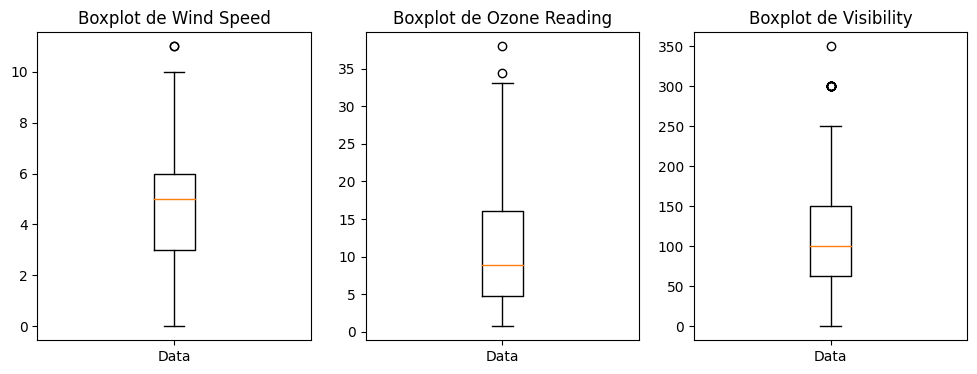

In [ ]:
# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Boxplot para Wind_speed
axes[0].boxplot(ozonedata['Wind_speed'])
axes[0].set_title('Boxplot de Wind Speed')

# Boxplot para Ozone_reading
axes[1].boxplot(ozonedata['ozone_reading'])
axes[1].set_title('Boxplot de Ozone Reading')

# Boxplot para Visibility
axes[2].boxplot(ozonedata['Visibility'])
axes[2].set_title('Boxplot de Visibility')

# Ajustes adicionales para mejorar la presentación
for ax in axes:
    ax.set_xticks([1])  # Solo mostrar etiqueta en la posición 1
    ax.set_xticklabels(['Data'])

plt.show()

Gracias a estos gráficos, se puede observar que las tres variables contienen outliers (son los puntos que superan los límites superiores o inferiores de este gráfico, en este caso son solo superiores). Profundizemos más en estos outliers con histogramas:

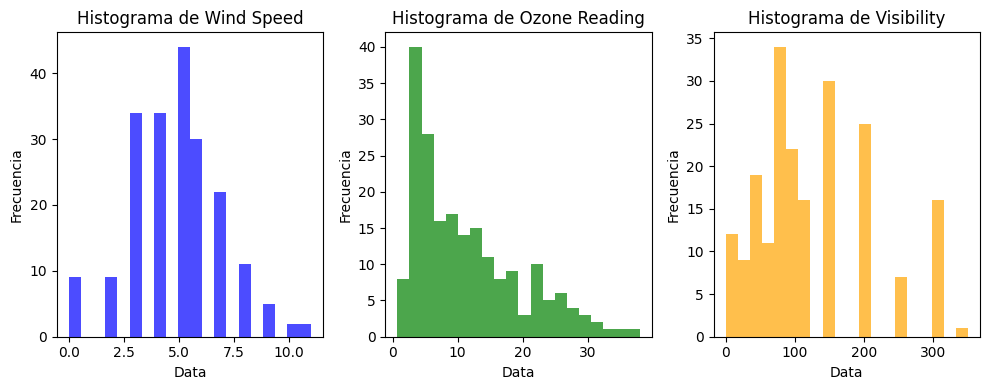

In [ ]:
# Variables de interés
variables_interes = ['Wind_speed', 'ozone_reading', 'Visibility']

# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Crear histograma para Wind_speed
axes[0].hist(ozonedata['Wind_speed'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histograma de Wind Speed')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frecuencia')

# Crear histograma para Ozone_reading
axes[1].hist(ozonedata['ozone_reading'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Histograma de Ozone Reading')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frecuencia')

# Crear histograma para Visibility
axes[2].hist(ozonedata['Visibility'], bins=20, color='orange', alpha=0.7)
axes[2].set_title('Histograma de Visibility')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Combinando la información que nos ofrecen estos dos gráficos distintos, se puede observar como la variable 'WindSpeed' parece tener algún outlier con valor mayor que 10. Por otro lado, la variable 'ozone_reading' tiene varios outliers con valor mayor que 32 o 33. Por último, la variable 'Visibility' tiene muchos outliers, muchos debido a que en el boxplot hay un punto con borde más oscuro, que indica una gran cantidad; lo cual lo respalda el histograma ya que hay alrededor de 15 datos con valor 300 y alguno con valor mayor que 300. Para saber exactamente cuáles son estos outliers, se ejecuta el siguiente código (que aplica lo mismo que el gráfico 'boxplot', pero de manera no gráfica):

In [ ]:
# Variables de interés
variables_interes = ['Wind_speed', 'ozone_reading', 'Visibility']

# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)].copy()  # Utilizar copy()
    outliers['Outlier_Variable'] = variable  # Agregar el nuevo campo
    return outliers

# Detectar outliers para cada variable de interés
allout = []
for variable in variables_interes:
    outliers = detectar_outliers(ozonedata, variable)
    allout.append(outliers)
    print(f"Outliers en {variable}:")
    print(outliers[variable])
    print("\n")

# Convertir la lista de DataFrames en un solo DataFrame
allout = pd.concat(allout, ignore_index=False)

# print("DataFrame con todos los outliers:")
# print(allout.loc[:, ['Wind_speed', 'ozone_reading', 'Visibility', 'Outlier_Variable']])

Outliers en Wind_speed:
21    11
35    11
Name: Wind_speed, dtype: int64


Outliers en ozone_reading:
102    34.39
128    37.98
Name: ozone_reading, dtype: float64


Outliers en Visibility:
21     350
22     300
23     300
27     300
28     300
29     300
34     300
41     300
53     300
57     300
58     300
63     300
161    300
165    300
184    300
186    300
196    300
Name: Visibility, dtype: int64




Tras analizar los gráficos y observar los valores atípicos, se decide qué hacer con estos valores extremos.

En cuanto a los valores atípicos de la variable 'ozone_reading', se decide no eliminar estos valores atípicos debido a que esta variable es la variable que se quiere explicar con el resto de campos, es decir, es la más importante, y se decide que cuanta más información se tenga sobre esta variable mejor, aunque sean valores extremos (además, nótese que esta decisión no afecta a las que ahora se tomen con 'Wind_speed' y Visibility debido a que no hay intersección entre outliers).

Por otro lado, en cuanto a los outliers de 'Visibility', se decide que los que tiene valor de 300 (que son 16), son suficientes para ser significativos y por esto no se eliminan del dataset. En cambio, sí se decide eliminar el valor que tiene 'Visibility' = 350, lo cual afecta a 'Wind_speed' eliminando uno de sus dos utliers, debido a que la intersección de outliers entre estas dos valores es este que tiene valor de 350 en 'Vislibility'. Por último, también se decide eliminar el otro registro que tiene 11 en 'Wind_speed'. Ests valores se eliminarán de la base de datos más adelante, después del apartado 2.

## 2.- (0,75 puntos)

Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y “Visibility”.

Ya se han calculado los outliers en el apartado anterior, los cuales se han guardado en forma de dataframe:

In [ ]:
print("DataFrame con todos los outliers:")
print(allout.loc[:, ['Wind_speed', 'ozone_reading', 'Visibility', 'Outlier_Variable']])

DataFrame con todos los outliers:
     Wind_speed  ozone_reading  Visibility Outlier_Variable
21           11           2.92         350       Wind_speed
35           11           2.79         200       Wind_speed
102           6          34.39          40    ozone_reading
128           5          37.98          70    ozone_reading
21           11           2.92         350       Visibility
22           10           4.08         300       Visibility
23            5           8.32         300       Visibility
27            8           5.73         300       Visibility
28            7           4.04         300       Visibility
29            5           6.04         300       Visibility
34            7           3.22         300       Visibility
41            0           7.63         300       Visibility
53            3          12.33         300       Visibility
57            6           9.32         300       Visibility
58            6          13.12         300       Visibility
63    

Con esto, basta con mirar los registros que tengan el mismo índice tal que su 'Outlier_Variable' sea 'Wind_speed' o 'Visibility' para calcular la intersección de outliers:

In [ ]:
# Filtrar outliers de 'Wind_speed' con el mismo índice
wind_speed_outliers = allout[allout['Outlier_Variable'] == 'Wind_speed']

# Filtrar outliers de 'Visibility' con el mismo índice
visibility_outliers = allout[allout['Outlier_Variable'] == 'Visibility']

# Calcular la intersección de los outliers entre 'Wind_speed' y 'Visibility' con el mismo índice
intersection_outliers = wind_speed_outliers[wind_speed_outliers.index.isin(visibility_outliers.index)]

print("Intersección de outliers entre 'Wind_speed' y 'Visibility':")
print(intersection_outliers[['Wind_speed', 'Visibility']])

Intersección de outliers entre 'Wind_speed' y 'Visibility':
    Wind_speed  Visibility
21          11         350


Por otro lado, para obtener la unión basta con observar qué registros tienen 'Outlier_Variable' igual a 'Wind_speed' o 'Visibility' y después eliminar los duplicados:

In [ ]:
union_outliers = allout[(allout['Outlier_Variable'] == 'Wind_speed') | (allout['Outlier_Variable'] == 'Visibility')]

# Eliminar la variable 'Outlier_Variable'
union_outliers = union_outliers.drop(columns=['Outlier_Variable'])

# Eliminar duplicados
union_outliers = union_outliers.drop_duplicates()

print("Unión de outliers entre 'Wind_speed' y 'Visibility':")
print(union_outliers[['Wind_speed', 'Visibility']])

Unión de outliers entre 'Wind_speed' y 'Visibility':
     Wind_speed  Visibility
21           11         350
35           11         200
22           10         300
23            5         300
27            8         300
28            7         300
29            5         300
34            7         300
41            0         300
53            3         300
57            6         300
58            6         300
63            7         300
161           5         300
165           7         300
184           4         300
186           0         300
196           4         300


Una vez calculadas la intersección y la unión, se eliminan los outliers que se han decidido eliminar tal y como se ha explicado al final del apartado anterior y se comprueba que se han eliminado estos se han eliminado correctamente con histogramas. No obstante, cabe resaltar que tiene sentido eliminar solo la intersección y no la unión, ya que es lo que parece realmente un valor atípico ya que solo hay uno.

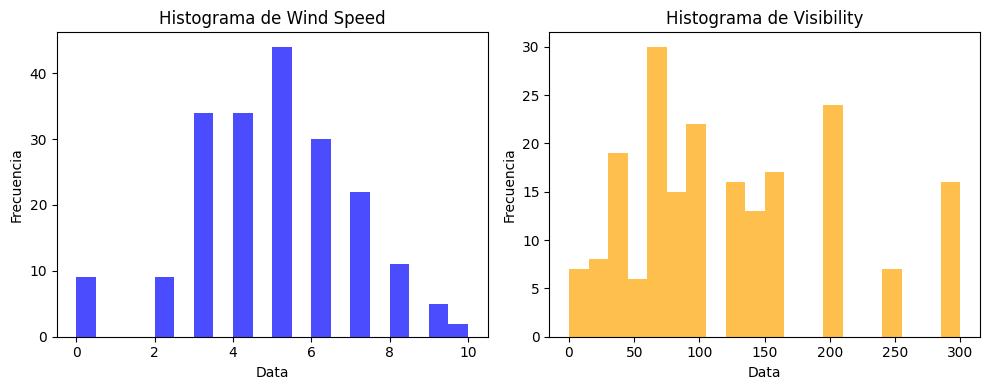

In [ ]:
ozonedata = ozonedata[(ozonedata['Visibility'] != 350) & (ozonedata['Wind_speed'] != 11)]

# Variables de interés
variables_interes = ['Wind_speed', 'ozone_reading', 'Visibility']

# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Crear histograma para Wind_speed
axes[0].hist(ozonedata['Wind_speed'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Histograma de Wind Speed')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Frecuencia')

# Crear histograma para Visibility
axes[1].hist(ozonedata['Visibility'], bins=20, color='orange', alpha=0.7)
axes[1].set_title('Histograma de Visibility')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 3.- (1 punto)

Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan relacionar diferentes variables ¿Qué nos dicen los datos?


Analizando la base de datos, en primer lugar se observa que ya hay algunas variables categóricas, como el mes, el día del mes o el día de la semana.

También, se observa que la variable 'Wind_speed', que en teoría es una variable continua, viene dada en un formato (números enteros entre el 0 y el 10) que permite que esta variable sea fácilmente interpretada como una variable categórica (hay 11 clases y cada una es un nivel de viento). Así, a partir de ahora esta variable se interpreta como una variable categórica.

Por otro lado, se decide categorizar tanto la variable 'Humidity' como la variable 'Visibility' (en nuevas variables/columnas para no perder las originales), y se crea la variable 'Estaciones' para futuras gráficas en las que analizar relaciones entre variables.

Comenzamos con la variable 'Estaciones'. Esta variable se va a crear con las estaciones definidas de la siguiente manera:
* Invierno: 21 de diciembre al 19 de marzo.
* Primavera: 20 de marzo al 20 de junio.
* Verano: 21 de junio al 21 de septiembre.
* Otoño: 22 de septiembre al 20 de diciembre.

In [ ]:
ozonedata['Estacion'] = 'invierno'  # Inicializamos con invierno

# Definimos las fechas de inicio y fin para cada estación, la estación, y la estación siguiente
estaciones = [
    (3, 20, 6, 20, 'primavera', 'verano'),
    (6, 21, 9, 21, 'verano', 'otoño'),
    (9, 22, 12, 20, 'otoño', 'invierno'),
    (12, 21, 3, 19, 'invierno', 'primavera')
]

# Función para asignar la estación
def obtener_estacion(row):
  estacion_anterior = 'invierno'
  for mes_inicio, dia_inicio, mes_fin, dia_fin, estacion, estacion_siguiente in estaciones:
    if (mes_inicio <= row['Month'] <= mes_fin):
      if row['Month'] == mes_inicio:
        if row['Day_of_month'] >= dia_inicio:
          return estacion
        else:
          return estacion_anterior
      elif row['Month'] == mes_fin:
        if row['Day_of_month'] <= dia_fin:
          return estacion
        else:
          return estacion_siguiente
      else:
        return estacion
    estacion_anterior = estacion
  return 'invierno'

# Aplicamos la función a cada fila del dataframe
ozonedata['Estacion'] = ozonedata.apply(obtener_estacion, axis=1)

# Muestra las primeras filas del dataframe con la nueva columna 'Estacion'
ozonedata.head()

,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility,Estacion
0,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60,invierno
1,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100,invierno
2,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250,invierno
3,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120,invierno
4,1,12,1,6.39,5720,3,44,51,54.32,111,9,63.14,150,invierno


A continuación, se discretiza la variable 'Visibility' según sus cuartiles:

In [ ]:
ozonedata['Visibility'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min      0.0
25%     60.0
50%    100.0
75%    150.0
max    300.0
Name: Visibility, dtype: float64

In [ ]:
# Define los límites de los intervalos para la variable HUMEDAD
intervalos = [0, 60, 100, 150, 300]
categorias = ['min-q1', 'q1-median', 'median-q3', 'q3-max']

# Crea la nueva columna "visibilidad_intervalos" utilizando pd.cut
ozonedata['visibilidad_intervalos'] = pd.cut(ozonedata['Visibility'], bins=intervalos, labels=categorias, include_lowest=True)

Por último, se van a crear 4 intervalos para clasificar la humedad. Del 0% al 25%, del 25% al 50%, del 50% al 75% y del 75% al 100%. Luego se va a crear un gráfico que muestre su distribución.

In [ ]:
# Define los límites de los intervalos para la variable HUMEDAD
intervalos = [0, 25, 50, 75, 100]
categorias = ['0-25', '25-50', '50-75', '75-100']

# Crea la nueva columna "humedad_intervalos" utilizando pd.cut
ozonedata['humedad_intervalos'] = pd.cut(ozonedata['Humidity'], bins=intervalos, labels=categorias, include_lowest=True)

Una vez se han categorizado algunas de las variables, se llevan a cabo representaciones que nos permitan
relacionar diferentes variables. En primer lugar, con el fin de ver si los datos tienen coherencia se observa, la relación Temperatura ~ Meses y  también Temperatura ~ Estación (es la misma relación pero en distinta escala):

Primero temperatura en SandBurg:

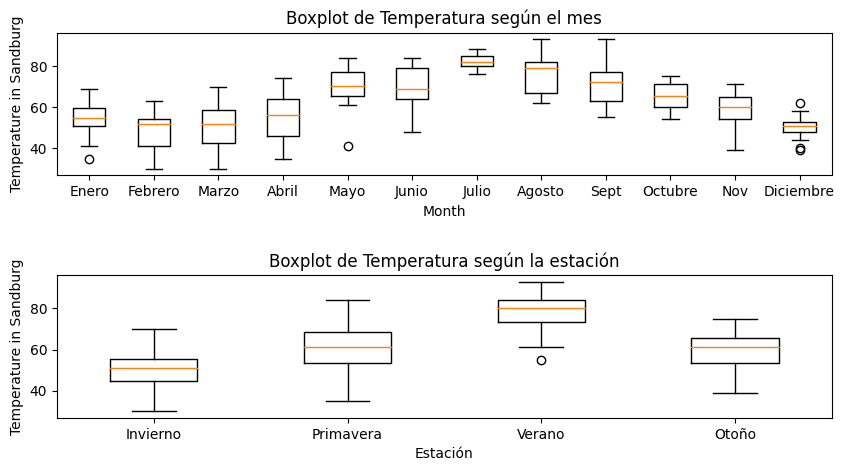

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

# Crea una lista con los nombres de los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Sept', 'Octubre', 'Nov', 'Diciembre']
# Crea el primer boxplot en el primer subplot
axs[0].boxplot([ozonedata[ozonedata['Month'] == i]['Temperature_Sandburg'] for i in range(1, 13)])
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Temperature in Sandburg')
axs[0].set_title('Boxplot de Temperatura según el mes')
axs[0].set_xticklabels(meses)

# Crea una lista con los nombres de los meses
estaciones = ['Invierno', 'Primavera', 'Verano', 'Otoño']
# Crea el segundo boxplot en el segundo subplot
axs[1].boxplot([ozonedata[ozonedata['Estacion'] == s]['Temperature_Sandburg'] for s in ozonedata['Estacion'].unique()])
axs[1].set_xlabel('Estación')
axs[1].set_ylabel('Temperature in Sandburg')
axs[1].set_title('Boxplot de Temperatura según la estación')
axs[1].set_xticklabels(estaciones)

# Ajusta el espacio entre subplots
plt.subplots_adjust(hspace=0.7)

# Muestra el gráfico
plt.show()

También la temperatura en El Monte:

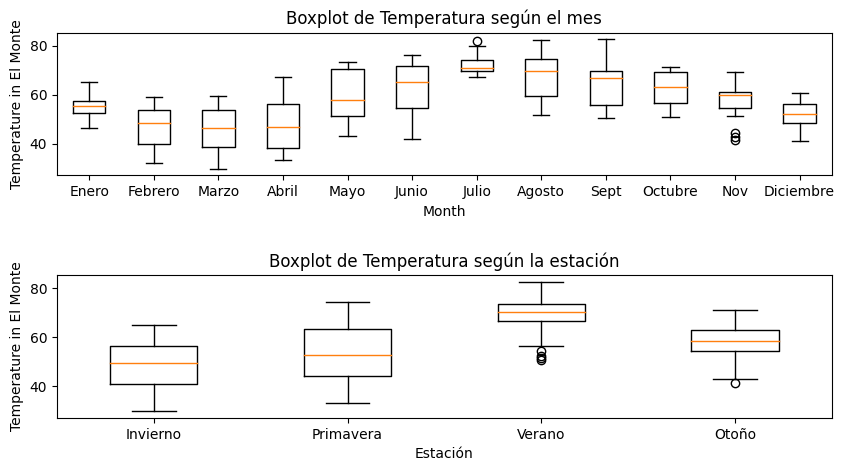

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

# Crea una lista con los nombres de los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Sept', 'Octubre', 'Nov', 'Diciembre']
# Crea el primer boxplot en el primer subplot
axs[0].boxplot([ozonedata[ozonedata['Month'] == i]['Temperature_ElMonte'] for i in range(1, 13)])
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Temperature in El Monte')
axs[0].set_title('Boxplot de Temperatura según el mes')
axs[0].set_xticklabels(meses)

# Crea una lista con los nombres de los meses
estaciones = ['Invierno', 'Primavera', 'Verano', 'Otoño']
# Crea el segundo boxplot en el segundo subplot
axs[1].boxplot([ozonedata[ozonedata['Estacion'] == s]['Temperature_ElMonte'] for s in ozonedata['Estacion'].unique()])
axs[1].set_xlabel('Estación')
axs[1].set_ylabel('Temperature in El Monte')
axs[1].set_title('Boxplot de Temperatura según la estación')
axs[1].set_xticklabels(estaciones)

# Ajusta el espacio entre subplots
plt.subplots_adjust(hspace=0.7)

# Muestra el gráfico
plt.show()

Con estas gráficas se puede comprobar que los datos de nuestro dataset tienen coherencia, haciendo más calor en los meses de verano, y más frío en los meses de invierno.

A continuación, se estudia la relación Ozono ~ Meses y  también Ozono ~ Estación (es la misma relación pero en distinta escala) con el fin de ver si momento del año tiene que ver con la cantidad de contaminación en Los Ángeles:

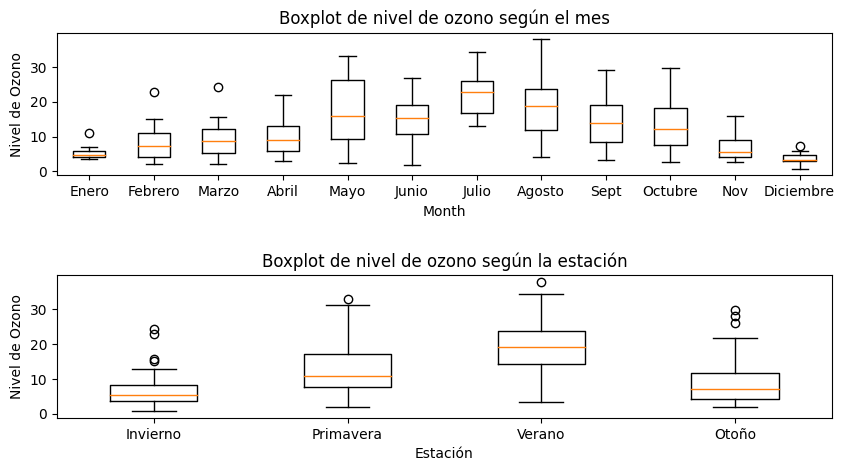

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

# Crea una lista con los nombres de los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Sept', 'Octubre', 'Nov', 'Diciembre']
# Crea el primer boxplot en el primer subplot
axs[0].boxplot([ozonedata[ozonedata['Month'] == i]['ozone_reading'] for i in range(1, 13)])
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Nivel de Ozono')
axs[0].set_title('Boxplot de nivel de ozono según el mes')
axs[0].set_xticklabels(meses)

# Crea una lista con los nombres de los meses
estaciones = ['Invierno', 'Primavera', 'Verano', 'Otoño']
# Crea el segundo boxplot en el segundo subplot
axs[1].boxplot([ozonedata[ozonedata['Estacion'] == s]['ozone_reading'] for s in ozonedata['Estacion'].unique()])
axs[1].set_xlabel('Estación')
axs[1].set_ylabel('Nivel de Ozono')
axs[1].set_title('Boxplot de nivel de ozono según la estación')
axs[1].set_xticklabels(estaciones)

# Ajusta el espacio entre subplots
plt.subplots_adjust(hspace=0.7)

# Muestra el gráfico
plt.show()

Según estas gráficas, se puede concluir que el momento del año sí que afecta al nivel de contaminación, de tal manera que en los meses de verano hay más contaminación mientras que en los meses de invierno mucho menos. Esto podría estar causado por varios factores:
* Más turismo en verano (más vuelos de entrada y salida, más movimiento en la ciudad)
* Menos tormentas (menos lluvia, menos viento) en verano
* Aumento de la actividad industrial (algunas industrias, como la generación de energía, aumentan su producción durante el verano para satisfacer la demanda de aire acondicionado)
* Otros posibles factores.

Por esto, se deduce que también puede que a mayor temperatura, mayor nivel de ozono. Veámoslo en una gráfica:

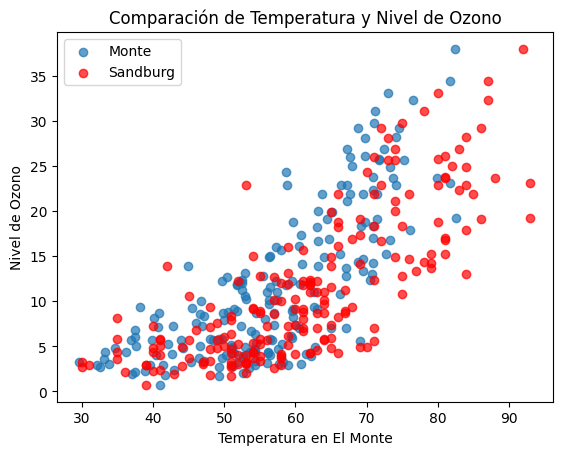

In [ ]:
# Crea un diagrama de dispersión con color y tamaño según la fecha
plt.scatter(ozonedata['Temperature_ElMonte'], ozonedata['ozone_reading'], alpha=0.7, label='Monte')
plt.scatter(ozonedata['Temperature_Sandburg'], ozonedata['ozone_reading'], alpha=0.7, color = 'r', label='Sandburg')


# Ajusta las etiquetas de los ejes
plt.xlabel('Temperatura en El Monte')
plt.ylabel('Nivel de Ozono')
plt.title('Comparación de Temperatura y Nivel de Ozono')
plt.legend()

# Muestra el gráfico
plt.show()


Se puede comprobar que la hipótesis es cierta.

Para continuar, se estudia la relación Ozono ~ Día de la semana con el fin de ver si da la casualidad de que hay algún día de la semana en el que se contamine más en Los Ángeles:

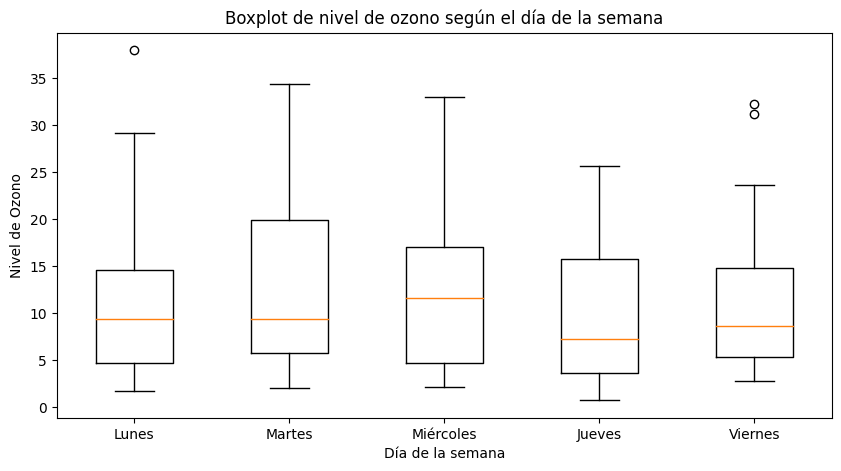

In [ ]:
# Crea un boxplot con matplotlib
plt.figure(figsize=(10, 5))

# Crea una lista con los nombres de los días de la semana
dia_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']#, 'Sábado', 'Domingo']
# No hay datos sobre estos dos últimos días de la semana
plt.boxplot([ozonedata[ozonedata['Day_of_week'] == i]['ozone_reading'] for i in range(1, 6)], labels=dia_semana)

# Agrega etiquetas y título al gráfico
plt.xlabel('Día de la semana')
plt.ylabel('Nivel de Ozono')
plt.title('Boxplot de nivel de ozono según el día de la semana')

# Muestra el gráfico
plt.show()

Analizando la gráfica, se concluye que no hay ninguna relación significativa entre el día de la semana y el nivel de ozono.

Por otro lado, se estudia la relación Ozono ~ Humedad. Por esto, se grafica esta variable 'humedad_intervalos' con respecto de la variable que indica el nivel de ozono registrado:

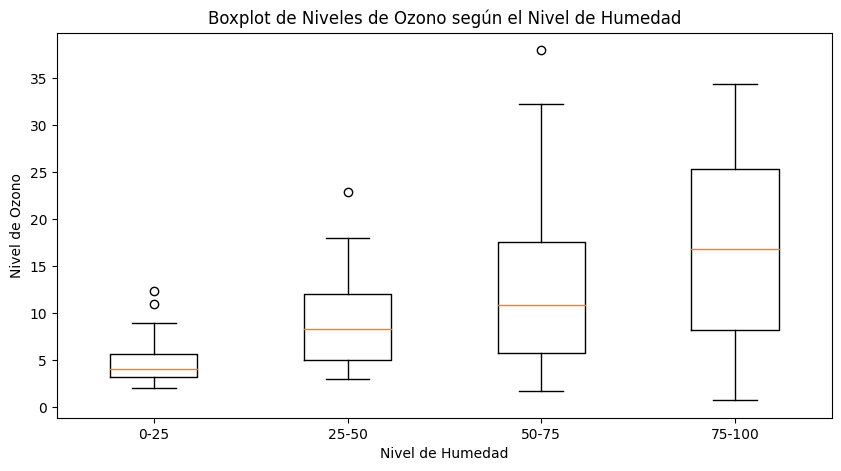

In [ ]:
# Crea un boxplot con matplotlib
plt.figure(figsize=(10, 5))
categorias = ['0-25', '25-50', '50-75', '75-100']
plt.boxplot([ozonedata[ozonedata['humedad_intervalos'] == cat]['ozone_reading'] for cat in categorias], labels=categorias)

# Agrega etiquetas y título al gráfico
plt.xlabel('Nivel de Humedad')
plt.ylabel('Nivel de Ozono')
plt.title('Boxplot de Niveles de Ozono según el Nivel de Humedad')

# Muestra el gráfico
plt.show()


Este gráfico de bigotes (boxplot) muestra los niveles de ozono que corresponden a los intervalos definidos anteriormente. Se puede observar que aparentemente estas dos variables son directamente proporcionales, ya que la mediana (linea naranja) y los cuartiles van incrementando sus valores de ozono según aumenta el porcentaje de humedad, siendo el de 75% a 100% el que tiene los valores de ozono más elevados.

Además, se observa que cuanta más humedad hay, más dispersos están los datos (hay más distancia entre cuartiles, más variabilidad). Esto puede indicar que una baja humedad implica fuertemente un nivel bajo de ozono. En cambio, al estar tan dispersos los datos en los niveles altos de humedad, no se podría afirmar tan fácilmente que una alta humedad implica un nivel alto de ozono.

Así, se concluye que el nivel de humedad afecta a la contaminación, de tal manera que cuanta más humedad, más probabilidad de mayor contaminación.

También, se quiere estudiar la relación Ozono ~ Visibility. Veámoslo en la siguiente gráfica:

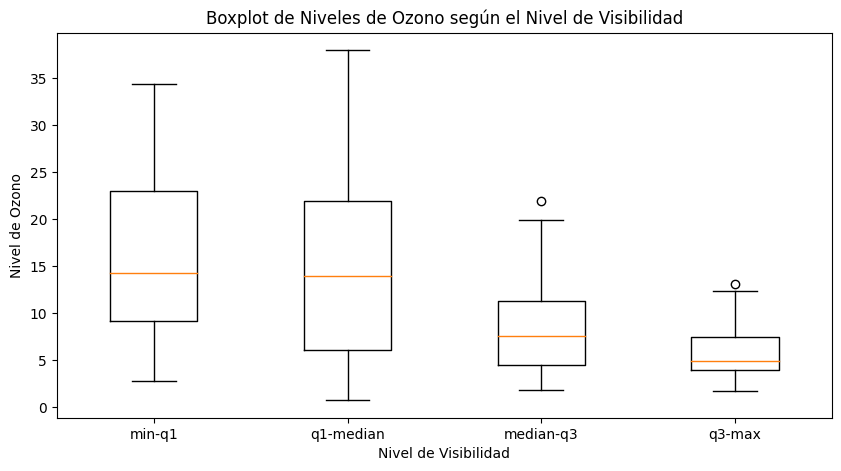

In [ ]:
# Crea un boxplot con matplotlib
plt.figure(figsize=(10, 5))
categorias = ['min-q1', 'q1-median', 'median-q3', 'q3-max']
plt.boxplot([ozonedata[ozonedata['visibilidad_intervalos'] == cat]['ozone_reading'] for cat in categorias], labels=categorias)

# Agrega etiquetas y título al gráfico
plt.xlabel('Nivel de Visibilidad')
plt.ylabel('Nivel de Ozono')
plt.title('Boxplot de Niveles de Ozono según el Nivel de Visibilidad')

# Muestra el gráfico
plt.show()


Se puede observar que aparentemente estas dos variables son inversamente proporcionales, ya que la mediana (linea naranja) y los cuartiles van decrementando sus valores de ozono según aumenta el porcentaje de humedad, siendo el de Q3 al valor máximo el que tiene los valores de ozono más bajos.

Además, se observa que cuanta menos visibilidad hay, más dispersos están los datos (hay más distancia entre cuartiles, más variabilidad). Esto nos quiere decir que cuando la visibilidad es alta, seguramente el nivel de ozono será bajo. Por otro lado, cuando la visibilidad sea baja, puede que el nivel de ozono sea alto, pero esta baja visibilidad no tiene por qué estar causada única y exclusivamente por el nivel de ozono, puede haber otras razones (niebla, por ejemplo).

Así, se concluye que el nivel de visibilidad es un potencial indicador de la contaminación.

Por último, se estudia la relación Ozono ~ Velocidad del viento:

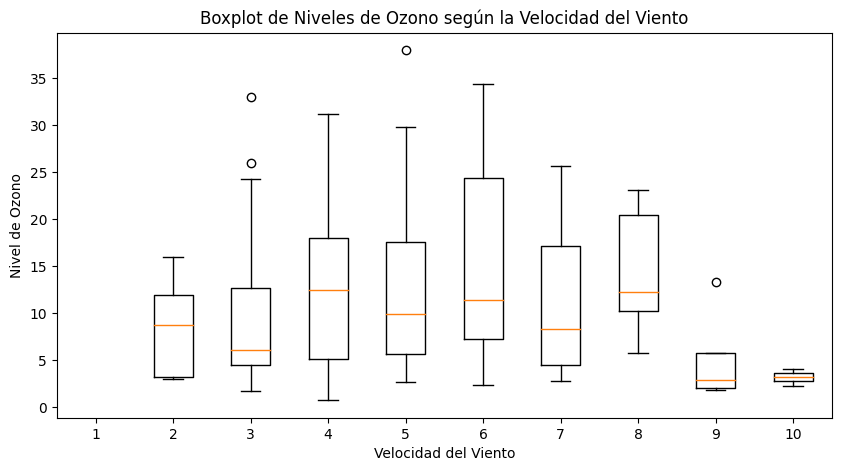

In [ ]:
# Crea un boxplot con matplotlib
plt.figure(figsize=(10, 5))

plt.boxplot([ozonedata[ozonedata['Wind_speed'] == i]['ozone_reading'] for i in range(1, 11)])

# Agrega etiquetas y título al gráfico
plt.xlabel('Velocidad del Viento')
plt.ylabel('Nivel de Ozono')
plt.title('Boxplot de Niveles de Ozono según la Velocidad del Viento')

# Muestra el gráfico
plt.show()

El gráfico sugiere que la velocidad del viento tiene un impacto complejo en los niveles de ozono. Se necesitan más investigaciones para comprender mejor esta relación.

## 4.- (1 punto)

Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.

Este apartado se podría interpretar de muchas maneras. Se tienen las variables Month, Day_of_month y Day_of_week. Si se quiere ver la distribución y las frecuencias de las variables lo mejor sería usar los meses del año (del 1 al 12). Los días de la semana es muy mala idea, puesto que son números del 1 al 5 y no muestran ninguna diferencia en las variables. Tampoco los días del mes, así que se ha escogido según los doce meses.

Solo se va a emplear una representación. Al principio se pensó en hacer gráficos de barras (barplots) con el promedio de esa variable en cada mes. También en hacer gráficos de línea uniendo los 12 promedios de esa variable, de manera que se pudiera reflexionar sobre las subidas y bajadas de dicho promedio a medida que va trascurriendo el año.

Estos promedios mencionados serían los siguientes:

In [ ]:
# Ordenar el DataFrame por mes
df_sorted = ozonedata.sort_values('Month', ascending=True)

# Seleccionar variables a incluir en la tabla
variables_to_include = [col for col in df_sorted.columns if col not in ["Month", "Day_of_month", "Day_of_week", "humedad_intervalos", "visibilidad_intervalos"]]

# Crear una tabla pivotante
pivot_table = pd.pivot_table(df_sorted, values=variables_to_include, index=df_sorted['Month'], aggfunc='mean')

# Mostrar la tabla
print(pivot_table)

        Humidity  Inversion_base_height  Inversion_temperature  \
Month                                                            
1      35.187500            2206.625000              61.137500   
2      61.062500            3123.125000              50.416250   
3      54.550000            2626.450000              51.548000   
4      56.571429            3037.190476              49.974286   
5      75.800000            1917.800000              66.812000   
6      64.941176            2175.941176              66.951765   
7      76.307692            1607.846154              75.435385   
8      67.266667            2063.800000              70.100000   
9      74.250000            2524.375000              67.865000   
10     64.055556            2709.111111              66.310000   
11     48.294118            2747.117647              61.594118   
12     32.523810            3392.190476              55.605714   

       Pressure_gradient  Temperature_ElMonte  Temperature_Sandburg  \
Mont

<ipython-input-551-514aa0061b9e>:8: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table = pd.pivot_table(df_sorted, values=variables_to_include, index=df_sorted['Month'], aggfunc='mean')


¿Cuál sería el problema de usar estos gráficos de barras con el promedio?

Que no se ve representada bien la frecuencia, que es la gracia de este apartado 4. Tampoco se puede ver la frecuencia en una variable continua, por lo que la clave está en categorizar estas. Se opta por categorizar las variables que hemos considerado importantes y hacer un gráfico de barras con estas categorías por cada mes.

Anteriormente ya se categorizó la variable de la humedad. Como esta puede tomar unos valores del 0 al 100% se decidió dividirla en cuatro intervalos iguales de 25%, los cuales son de 0 a 25, de 25 a 50, de 50 a 75 y de 75 a 100.  

Se va a emplear esta variable dividida en cuatro intervalos, de manera que en cada mes haya cuatro barras (una por intervalo) y se muestre su frecuencia. Lógicamente, si ha habido más días de un intervalo, su respectiva frecuencia será más elevada, igual que la barra que será más alta. Se considera que esta es la mejor forma de representar visualmente las frecuencias en estas variables.

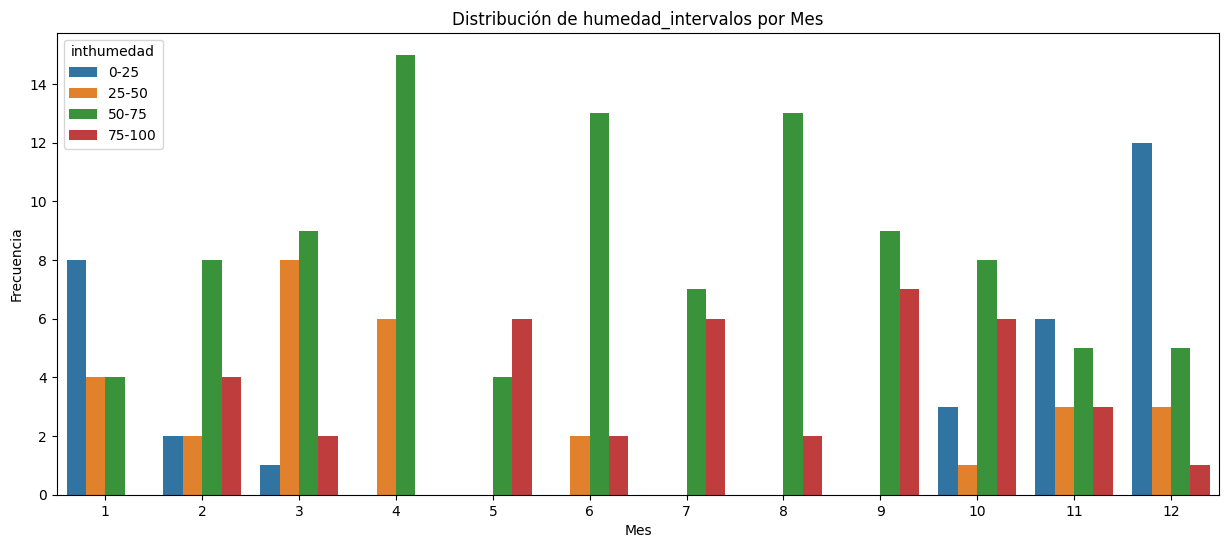

In [ ]:
# Definir el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Ordenar el DataFrame por mes
df_sorted = ozonedata.sort_values('Month', ascending=True)

# Establecer el orden de los intervalos para la variable 'inthumedad'
order_intervalos = ['0-25', '25-50', '50-75', '75-100']

# Crear el barplot
sns.countplot(x='Month', hue='humedad_intervalos', order=range(1, 13), hue_order=order_intervalos, data=df_sorted)

# Añadir etiquetas y leyenda
plt.title('Distribución de humedad_intervalos por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.legend(title='inthumedad')

# Mostrar el gráfico
plt.show()


Como se puede observar, se tienen 4 colores para representar los 4 intervalos. El azul para 0-25, el naranja para 25-50, el verde para 50-75 y el rojo para 75-100. Debido a que hay más mediciones en algunos meses que en otros, la suma de las frecuencias no es la misma en todos los meses. De hecho es muy diferente (ver meses 4 y 5). Lo que más importa son los colores y su proporción.

El primer intervalo de 0 a 25 (color azul) aparece en los primeros tres meses y últimos 3 meses.

El segundo intervalo de 25 a 50 (color naranja) aparece en todos los meses excepto los 5, 7 y 8, donde solo hay del 50 al 100 (rojo y verde).

El intervalo de 50 a 75 (color verde) aparece en todos los meses y el intervalo de 75 a 100 (color rojo) aparece en todos los meses excepto el primero. Estos dos colores se concentran más a mitad de año, pero ¿Por qué sucede esto?

En cada población la ubicación juega un papel muy importante. Lógicamente si una ciudad tiene costa, tendrá mayor humedad y menos variacion de temperatura. En nuestro caso vamos a relacionar los datos con conceptos generales (meteorológicos) teniendo en cuenta las distribuciones y frecuencias.

Como norma general: La humedad del aire es menor en invierno.

En invierno las temperaturas suelen ser bajas y el aire frío tiene una capacidad  menor de retener la humedad que el aire cálido. Si cuando el aire se enfría, la capacidad para retener vapor de agua disminuye, entonces la humedad relativa es inferior.

Debido a las bajas temperaturas, en invierno se evapora menos agua. En los cuerpos de agua, suelo y vegetación se evapora menos agua que en verano, por lo que en el aire resultan niveles de humedad más bajos.

El aire frío puede contener menos vapor de agua en comparación con el aire cálido. Cuando el aire se enfría, el vapor de agua tiende a condensarse en forma de gotas de agua o hielo, reduciendo así la cantidad de vapor de agua presente en el aire.

En invierno, los días son más cortos y la radiación solar es menos intensa. Esto puede afectar la evaporación y reducir la cantidad de agua disponible en forma de vapor en el aire.

La humedad en invierno es, por lo tanto, contraria a la de verano ya que las condiciones de temperatura son opuestas. En primavera y otoño los niveles de humedad ya son más moderados.

Otra variable que consideramos importante es la visibilidad. Esta ya la hemos categorizado anteriormente en el apartado 3, por lo que se procede a realizar el gráfico:



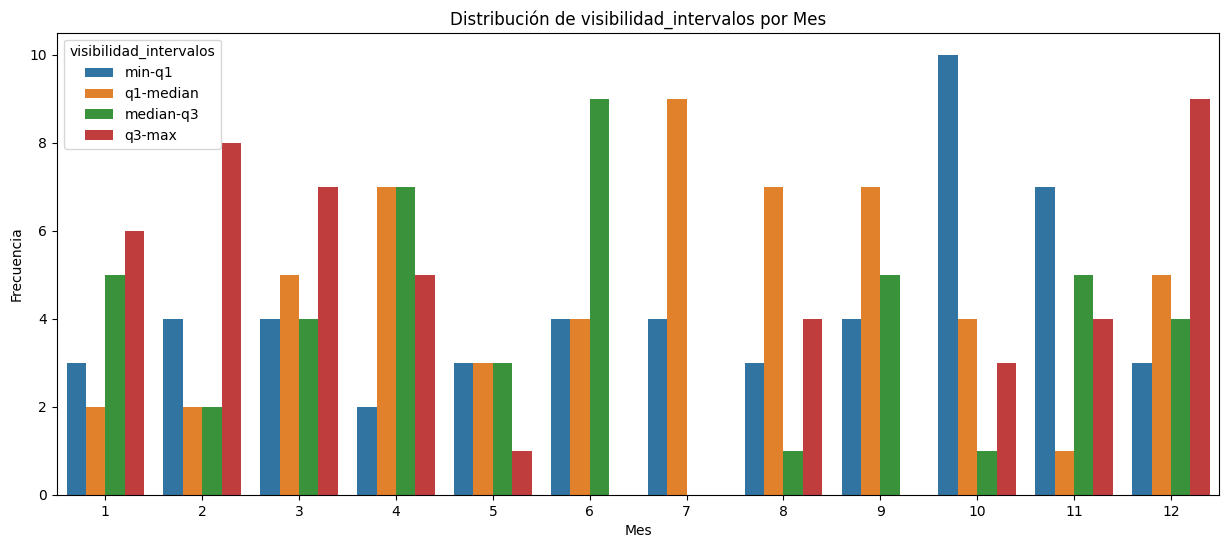

In [ ]:
# Definir el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Ordenar el DataFrame por mes
df_sorted = ozonedata.sort_values('Month', ascending=True)

# Establecer el orden de los intervalos para la variable 'inthumedad'
order_intervalos = ['min-q1', 'q1-median', 'median-q3', 'q3-max']

# Crear el barplot
sns.countplot(x='Month', hue='visibilidad_intervalos', order=range(1, 13), hue_order=order_intervalos, data=df_sorted)

# Añadir etiquetas y leyenda
plt.title('Distribución de visibilidad_intervalos por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.legend(title='visibilidad_intervalos')

# Mostrar el gráfico
plt.show()

Aparecen los cuatro cuartiles en todos los meses del año, excepto el rojo, que no aparece en los 6,7 ni 9 y el verde que no aparece en el 7.

Los cuartiles naranja y verde no nos dicen mucho. El azul tiene una alta frecuencia en el mes 10. Nosotros lo que más destacaríamos es la poca presencia del cuartil rojo en los meses a mitad de año (del 5 al 9).

¿Por qué hay menor visibilidad en verano que en invierno?

La visibilidad atmosférica puede estar influenciada por varios factores, y la idea de que haya menor visibilidad en verano que en invierno no es una regla general. La visibilidad puede variar debido a diversas condiciones meteorológicas y factores ambientales.

En muchas áreas urbanas, la actividad industrial y el aumento del tráfico durante el verano pueden aumentar las concentraciones de contaminantes atmosféricos, como partículas finas y aerosoles. Estos contaminantes pueden reducir la visibilidad al dispersar la luz.

En regiones con climas cálidos durante el verano, la temperatura puede aumentar, lo que puede conducir a una mayor evaporación de agua. Esto puede dar lugar a la presencia de partículas en el aire, como polvo y aerosoles, que afectan la visibilidad.

En algunas áreas, los incendios forestales son más comunes durante la temporada de verano. El humo de los incendios puede afectar significativamente la visibilidad, especialmente si la región está cubierta por una capa de humo.

Aunque no siempre es el caso, en algunas regiones, la humedad relativa del aire puede ser más alta en verano. Esto puede contribuir a la formación de neblina y aumentar la cantidad de partículas de agua en suspensión, lo que afecta la visibilidad.

Por último se va a categorizar la variable ozone_reading, también creando los cuartiles.

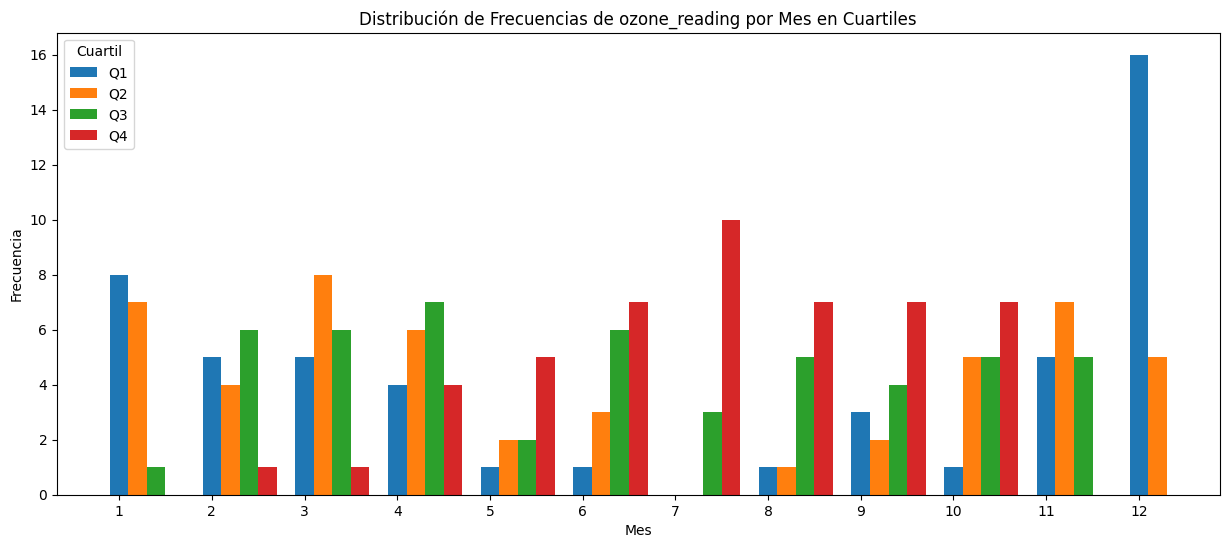

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Ordenar el DataFrame por mes
df_sorted = ozonedata.sort_values('Month', ascending=True)

# Calcular los cuartiles para la variable 'ozone_reading'
q1 = df_sorted['ozone_reading'].quantile(0.25)
q2 = df_sorted['ozone_reading'].quantile(0.50)
q3 = df_sorted['ozone_reading'].quantile(0.75)

# Definir intervalos basados en cuartiles
intervalos = [0, q1, q2, q3, df_sorted['ozone_reading'].max()]

# Crear el barplot con frecuencias en lugar de valores de ozone_reading
for i in range(len(intervalos) - 1):
    lower_bound = intervalos[i]
    upper_bound = intervalos[i + 1]
    frequencies = df_sorted[(df_sorted['ozone_reading'] >= lower_bound) & (df_sorted['ozone_reading'] < upper_bound)].groupby('Month').size()
    plt.bar(frequencies.index + i*0.2, frequencies, width=0.2, label=f'Q{i+1}')

# Añadir etiquetas y leyenda
plt.title('Distribución de Frecuencias de ozone_reading por Mes en Cuartiles')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.legend(title='Cuartil', loc='upper left')

# Ajustar las etiquetas del eje x
plt.xticks(range(1, 13))

# Mostrar el gráfico
plt.show()


Los cuartiles tienen en cuenta la cantidad de ozono en el aire. Como más alto sea el intervalo, más ozono hay (más en el 4 que en el 1).

El primer cuartil (azul) aparece en todos los meses excepto en el 7. Con mayor frecuencia en invierno que en verano. Sobretodo en el mes 12.

El segundo cuartil (naranja) también aparece en todos los meses excepto en el 7. Hay más en invierno que en verano, pero la variabilidad es más moderada.

El tercer cuartil (verde) aparece en todos los meses excepto el 12. Tiene la frecuencia más alta en los meses 2, 3 y 4.

El cuarto cuartil (rojo) no aparece en los meses 1, 11 ni 12. Tiene mucha más frecuencia en verano que en invierno.

¿Por qué sucede esto?

La variación estacional en los niveles de ozono en la atmósfera está relacionada con varios factores, y la presencia de más ozono en el aire durante el verano que en el invierno se puede atribuir principalmente a la interacción de la radiación solar con ciertos contaminantes atmosféricos.

Durante el verano, hay una mayor incidencia de radiación solar en muchas regiones del mundo. La radiación solar proporciona la energía necesaria para desencadenar reacciones químicas en la atmósfera que conducen a la formación de ozono. La luz solar descompone los óxidos de nitrógeno (NOx) y los compuestos orgánicos volátiles (COVs), liberando átomos de oxígeno libres que se combinan con moléculas de oxígeno para formar ozono (O3).

Las temperaturas más cálidas durante el verano favorecen la formación y acumulación de ozono. Las reacciones químicas que llevan a la producción de ozono son más eficientes a temperaturas más altas.

La fotoquímica es el conjunto de reacciones químicas que ocurren bajo la influencia de la luz solar. Durante el verano, hay una mayor actividad fotoquímica debido a la intensidad solar, lo que contribuye a la formación de ozono.

En muchos lugares, durante el verano, las condiciones atmosféricas pueden volverse más estables, lo que significa que hay menos dispersión vertical de los contaminantes. Esto puede llevar a la acumulación de ozono en capas más bajas de la atmósfera.

# Práctica 3 (Reducción de la dimensionalidad)
Valor (4 puntos)

Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias dimensiones para ello. Para evitar esto, existe una metodología en la cual, un set de datos multidimensional, podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha metodología se conoce con el nombre de Principal Component Analysis (PCA).

Vamos a aplicarlo a un set de datos que está colgado en Canvas llamado USA.xlsx y vamos a dar una serie de explicaciones de que ocurre.

1.- (1 punto) Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikit-learn.

2.- (1 punto) El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes?

3.- (1 punto) Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usando los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria. Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades de forma aleatoria y explicar qué pasa con ellas.

4.- (1 punto) Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara los resultados y coméntalos

Empezamos cargando el archivo con los datos.

In [ ]:
# Carga de datos
file_path = '/content/USA.xlsx'
data = pd.read_excel(file_path)

Una vez guardada la base de datos vamos a observar antes de nada como es.

Vemos el número de columnas y filas que tiene, es decir, el número de variables y el número de individuos.

In [ ]:
data.shape

(41, 8)

Comprobamos como se llaman las variables.

In [ ]:
data.columns

Index(['Ciudad', 'SO2', 'Neg.Temp', 'Empresas', 'Poblacion', 'Viento',
       'Precip', 'Dias'],
      dtype='object')

Para conocer un poco más acerca de como es la base de datos sobre como son las variables utilizamos la siguiente instrucción.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ciudad     41 non-null     object 
 1   SO2        41 non-null     float64
 2   Neg.Temp   41 non-null     float64
 3   Empresas   41 non-null     float64
 4   Poblacion  41 non-null     float64
 5   Viento     41 non-null     float64
 6   Precip     41 non-null     float64
 7   Dias       41 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.7+ KB


Vemos que hay una variable que no es número, pero el resto lo son y que todas no tienen nulos. Aun así lo comprobamos con el siguiente comando.

In [ ]:
print(data.isna().sum())

Ciudad       0
SO2          0
Neg.Temp     0
Empresas     0
Poblacion    0
Viento       0
Precip       0
Dias         0
dtype: int64


Como ya habiamos visto, no hay valores nulos en esta variable.

Para ver más en detalle mostramos las 5 primeras filas.

In [ ]:
data.head()

,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
1,Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
2,San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
3,Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
4,Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0


1. **Ciudad**: Esta columna representa el nombre de la ciudad. Es un objeto, lo que significa que es una cadena de texto.

2. **SO2**: Esta columna podría representar los niveles de dióxido de azufre (SO2) en el aire. Los niveles de SO2 suelen medirse en partes por billón (ppb).

3. **Neg.Temp**: Esta columna podría representar la temperatura negativa, es decir, cuántos días al año la temperatura cae por debajo de 0 grados Celsius.

4. **Empresas**: Esta columna podría representar el número de empresas en cada ciudad. No tiene unidades ya que es un conteo.

5. **Poblacion**: Esta columna representa la población de la ciudad. Al igual que con las empresas, no tiene unidades ya que es un conteo.

6. **Viento**: Esta columna podría representar la velocidad media del viento en la ciudad. La velocidad del viento se suele medir en kilómetros por hora (km/h) o metros por segundo (m/s).

7. **Precip**: Esta columna podría representar la precipitación anual en la ciudad. La precipitación se suele medir en milímetros (mm) o pulgadas.

8. **Dias**: Esta columna podría representar el número de días en el año para un evento específico, como días de lluvia, días de nieve, etc. No tiene unidades ya que es un conteo.

Con la siguiente instrucción comprobamos cual es la media, varianza, mínimo máximo y cuartiles de cada variable númerica. Esto nos sirve para asegurarnos de que los valores mínimos y máximos sean posibles y no haya errores.

In [ ]:
data.describe()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.048780,55.763415,463.097561,608.609756,9.443902,36.769024,113.902439
std,23.472272,7.227716,563.473948,579.113023,1.428644,11.771550,26.506419
min,8.000000,43.500000,35.000000,71.000000,6.000000,7.050000,36.000000
25%,13.000000,50.600000,181.000000,299.000000,8.700000,30.960000,103.000000
50%,26.000000,54.600000,347.000000,515.000000,9.300000,38.740000,115.000000
75%,35.000000,59.300000,462.000000,717.000000,10.600000,43.110000,128.000000
max,110.000000,75.500000,3344.000000,3369.000000,12.700000,59.800000,166.000000


Con el conocimiento que tenemos todos los datos parecen correctos así que pasamos a responder a la primera pregunta.

 ## 1.- (1 punto)
 Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikit-learn.

En primer lugar, estandarizamos los datos para que tengan media 0 y desviación típica 1 utilizando `StandarScaler()` como se especifica.

In [ ]:
pca_columns = ['SO2', 'Neg.Temp', 'Empresas', 'Poblacion', 'Viento',
       'Precip', 'Dias']

# Estandariza tus datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[pca_columns])

Comprobamos que ha pasado en la base de datos mostrando las primeras 5 columnas igual que antes.

In [ ]:
# Crear un nuevo DataFrame con los datos estandarizados
df_scaled = pd.DataFrame(df_scaled, columns=pca_columns)

# Ver el nuevo DataFrame
print('-> 5 primeras ciudades ANTES de normalizar\n')
print(data.head())
print('\n\n-> 5 primeras ciudades DESPUES de normalizar\n')
print(df_scaled.head())

-> 5 primeras ciudades ANTES de normalizar

          Ciudad   SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip   Dias
0        Phoenix  10.0      70.3     213.0      582.0     6.0    7.05   36.0
1    Little Rock  13.0      61.0      91.0      132.0     8.2   48.52  100.0
2  San Francisco  12.0      56.7     453.0      716.0     8.7   20.66   67.0
3         Denver  17.0      51.9     454.0      515.0     9.0   12.95   86.0
4       Hartford  56.0      49.1     412.0      158.0     9.0   43.37  127.0


-> 5 primeras ciudades DESPUES de normalizar

        SO2  Neg.Temp  Empresas  Poblacion    Viento    Precip      Dias
0 -0.864758  2.036213 -0.449363  -0.046520 -2.440555 -2.556012 -2.975514
1 -0.735360  0.733515 -0.668567  -0.833224 -0.881504  1.010653 -0.531009
2 -0.778493  0.131192 -0.018143   0.187743 -0.527174 -1.385471 -1.791457
3 -0.562829 -0.541168 -0.016346  -0.163651 -0.314576 -2.048577 -1.065744
4  1.119347 -0.933378 -0.091810  -0.787770 -0.314576  0.567723  0.500266


Y con la misma instrucción de antes mostramos la media y desviación típica.

In [ ]:
print('-> Mostramos los datos tras haber normalizado\n')
print(df_scaled.describe().round(3))

-> Mostramos los datos tras haber normalizado

          SO2  Neg.Temp  Empresas  Poblacion  Viento  Precip    Dias
count  41.000    41.000    41.000     41.000  41.000  41.000  41.000
mean    0.000     0.000    -0.000     -0.000   0.000   0.000  -0.000
std     1.012     1.012     1.012      1.012   1.012   1.012   1.012
min    -0.951    -1.718    -0.769     -0.940  -2.441  -2.556  -2.976
25%    -0.735    -0.723    -0.507     -0.541  -0.527  -0.500  -0.416
50%    -0.175    -0.163    -0.209     -0.164  -0.102   0.170   0.042
75%     0.214     0.495    -0.002      0.189   0.819   0.545   0.538
max     3.449     2.765     5.176      4.826   2.307   1.981   1.990


Como los datos no se distribuyen perfectamente como una normal vemos que la desviación típica no es exactamente 1 y la media aunque es cercana a 0 no es igual, pero los datos ya están normalizados.

Con los datos ya estandarizados pasamos al segundo apartado.

##2.- (1 punto)
El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes?

Calculamos la matriz de covarianza, los autovectores y autovalores.

In [ ]:
# Calcular la matriz de covarianza
cov_matrix = np.cov(df_scaled, rowvar=False)

# Obtener autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Habiendo calculado los autovalores mostramos la importancia de cada uno.

In [ ]:
# Calcular el porcentaje de varianza y acumulado por cada componente
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Crear un DataFrame con los resultados
result_df = pd.DataFrame({
    'Componente': range(1, len(explained_variance_ratio) + 1),
    'Autovalor': eigenvalues,
    'Varianza Explicada': explained_variance_ratio,
    'Varianza Acumulada': cumulative_variance_ratio
})

# Configurar la columna 'Componente' como índice
result_df.set_index('Componente', inplace=True)

# Ver el DataFrame
print(result_df)

            Autovalor  Varianza Explicada  Varianza Acumulada
Componente                                                   
1            2.796323            0.389731            0.389731
2            0.026153            0.003645            0.393376
3            0.102795            0.014327            0.407703
4            0.355448            0.049540            0.457243
5            0.914291            0.127427            0.584670
6            1.550143            0.216048            0.800718
7            1.429847            0.199282            1.000000


Como no estan ordenados lo primero es ordenarlos de mayor a menor

In [ ]:
# Ordenar autovalores de mayor a menor
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calcular el porcentaje de varianza y acumulado
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Crear un DataFrame con los resultados
result_df = pd.DataFrame({
    'Componente': range(1, len(explained_variance_ratio) + 1),
    'Autovalor': sorted_eigenvalues,
    'Varianza Explicada': explained_variance_ratio,
    'Varianza Acumulada': cumulative_variance_ratio
})

# Configurar la columna 'Componente' como índice
result_df.set_index('Componente', inplace=True)

print(result_df)

            Autovalor  Varianza Explicada  Varianza Acumulada
Componente                                                   
1            2.796323            0.389731            0.389731
2            1.550143            0.216048            0.605779
3            1.429847            0.199282            0.805061
4            0.914291            0.127427            0.932488
5            0.355448            0.049540            0.982028
6            0.102795            0.014327            0.996355
7            0.026153            0.003645            1.000000


Por lo tanto con dos componentes se está expresando un 60,6% de la base de datos original, perdiendo prácticamente un 40% de la variabilidad de los datos, siendo algo muy perjudicial.

Por otro lado si guardamos 3 componentes ya se alcanzaría un 80,5% siendo algo mucho más significativo, pero para este caso sería más adecuado utilizar 4 componentes para guardar más del 90%.

Para conocer con más detalle que esta explicando cada componente principal se estudian en más detalle los autovectores.

Utilizando los autovectores para ver la relación de cada componente principal con las variables originales obtenemos el siguiente mapa de calor.

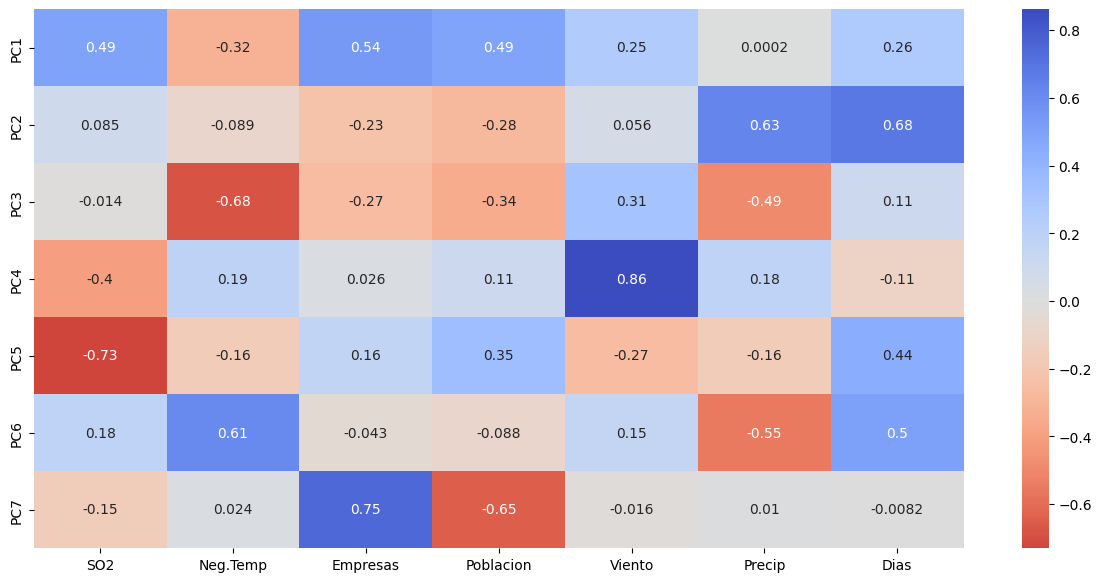

In [ ]:
df_eigenvectors = pd.DataFrame(sorted_eigenvectors, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7'], index=pca_columns).round(4)

# Visualiza los cos2 con un mapa de calor
plt.figure(figsize=(15, 7))  # Ajusta el tamaño de la figura aquí
sns.heatmap(df_eigenvectors.T, annot=True, cmap='coolwarm_r', center = 0)
plt.show()

* La **primera componente** se relaciona positivamente con SO2, el número de empresas y la población; y se relaciona negativamente con neg. temp.

* La **segunda componente** se relaciona positivimante con el nivel de precipitaciones y los días, además, aunque no es alta parece tener una pequeña relación negativa con el número de empresas  y la población.

* La **tercera componente** se relaciona de forma muy negativa con la columna Neg. Temp y el nivel de precipitaciones.

* La **componente cuatro** se relaciona muy positivamente con el viento y negativamente con el nivel de SO2.

El problema es que esto no expresa la variabilidad explicada de cada componente, para eso hace falta relacionar tanto el autovecto como el autovalor obtenidos. Para calcular la variabilidad explicada de cada columna por las dos primeras componentes utilizamos las siguientes fórmulas que dimos en Estadística el curso pasado:

$$ \text{cos2} = (\text{sorted_eigenvectors} \times \sqrt{\text{sorted_eigenvalues}})^2 $$

Donde:
- $\text{sorted_eigenvectors} := $ vectores propios ordenados
- $\text{sorted_eigenvalues} := $ valores propios ordenados

Representando esto en un mapa de calor solo se obtiene la variabilidad explicada y no el signo que relaciona la componente con la variable. Por esto ambas gráficas son complementarias.

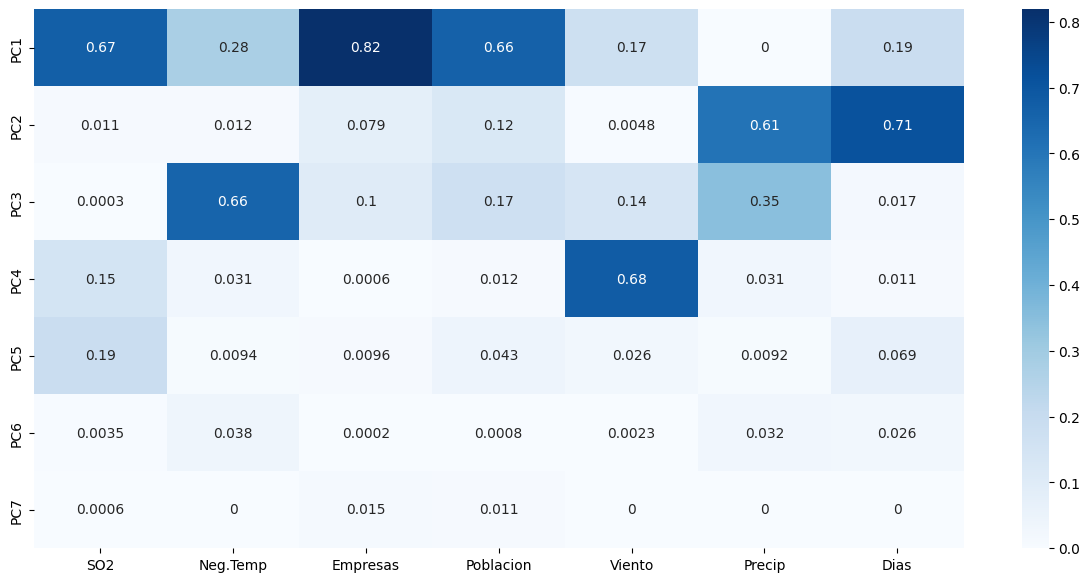

In [ ]:
# Asumiendo que 'pca' es tu modelo PCA ajustado y 'df_scaled' son tus datos estandarizados
loadings = sorted_eigenvectors * np.sqrt(sorted_eigenvalues)

# Calcula los cuadrados de las correlaciones (cos2) para las primeras 5 componentes principales
cos2 = loadings**2
cos2_df = pd.DataFrame(cos2[:, :7], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7'], index=pca_columns).round(4)

# Visualiza los cos2 con un mapa de calor
plt.figure(figsize=(15, 7))  # Ajusta el tamaño de la figura aquí
sns.heatmap(cos2_df.T, annot=True, cmap='Blues')
plt.show()

Tras haber obtenido estos valores se va a realizar un análisis detallado del número de componentes necesarias para explicar todas las variables originales de la base de datos utilizando dos gráficos de barras.

El primer muestra la suma total de la variabilidad explicada por las dos primeras componentes principales y el segundo por las tres primeras componentes.

 -> Con las dos primeras componentes:
SO2          0.6817
Neg.Temp     0.2903
Empresas     0.8980
Poblacion    0.7881
Viento       0.1794
Precip       0.6072
Dias         0.9018
dtype: float64


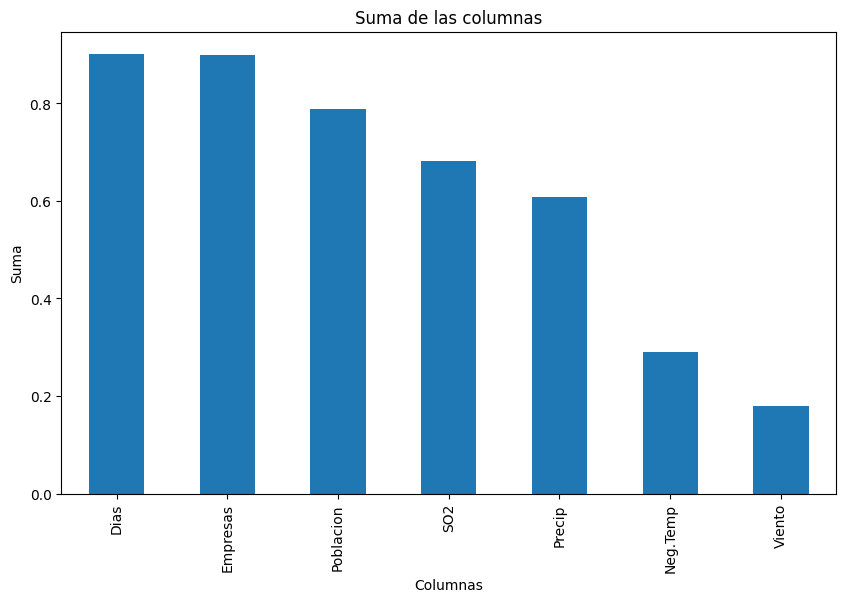

In [ ]:
column_sums = cos2_df.T[:2].sum()

# Imprime las sumas de las columnas
print(' -> Con las dos primeras componentes:')
print(column_sums)

# Ordena las sumas de las columnas de mayor a menor
column_sums_sorted = column_sums.sort_values(ascending=False)

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura aquí
column_sums_sorted.plot(kind='bar')
plt.title('Suma de las columnas')
plt.xlabel('Columnas')
plt.ylabel('Suma')
plt.show()

Vemos que con dos componentes principales hay varias variables de la base de datos que no son representadas y perdiendo mucha información. En concreto:

- SO2 (68 %)
- Precip (60 %)
- Neg.Temp (29 %)
- Viento (18 %)
- Viento (32 %)

 -> Con las tres primeras componentes:
SO2          0.6820
Neg.Temp     0.9459
Empresas     1.0001
Poblacion    0.9581
Viento       0.3179
Precip       0.9534
Dias         0.9190
dtype: float64


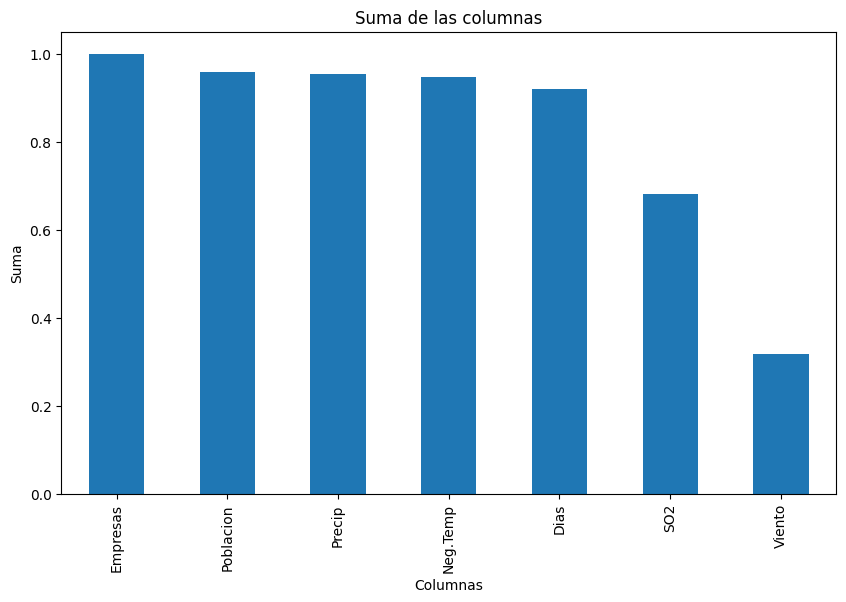

In [ ]:
# Asumiendo que 'cos2_df' es tu DataFrame
column_sums = cos2_df.T[:3].sum()

# Imprime las sumas de las columnas
print(' -> Con las tres primeras componentes:')
print(column_sums)

# Ordena las sumas de las columnas de mayor a menor
column_sums_sorted = column_sums.sort_values(ascending=False)

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura aquí
column_sums_sorted.plot(kind='bar')
plt.title('Suma de las columnas')
plt.xlabel('Columnas')
plt.ylabel('Suma')
plt.show()

Con esto podemos comprobar como si utilizamos 2 componentes hay varias variables que no reflejan toda su información, pero con tres ya se expresa la mayoría e la información, excepto con dos variables:

- SO2 (68 %)
- Viento (32 %)

Para expresar la información de estas dos columnas haría falta añadir más componentes principales, pero para poder visualizarlo nos quedaremos solo con tres.

## 3.- (1 punto)
Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usando los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria. Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades de forma aleatoria y explicar qué pasa con ellas.

Para representar las 41 ciudades en un diagrama de dispersión utilizando las tres primeras componentes principales hace falta encontrar las coordenadas de cada ciudad utilizando las componentes. Este calculo se hace haciendo un producto escalar entre los datos de cada ciudad por el autovector de la componente correpondiente a la coordenada.

In [ ]:
# Proyecta los datos en el espacio de las tres primeras componentes principales
projected_data = df_scaled.dot(sorted_eigenvectors[:, :3])

Tras haber obtenido las coordenadas de las 41 ciudades con las tres primeras componentes principales las representamos en un gráfico de dispersión.

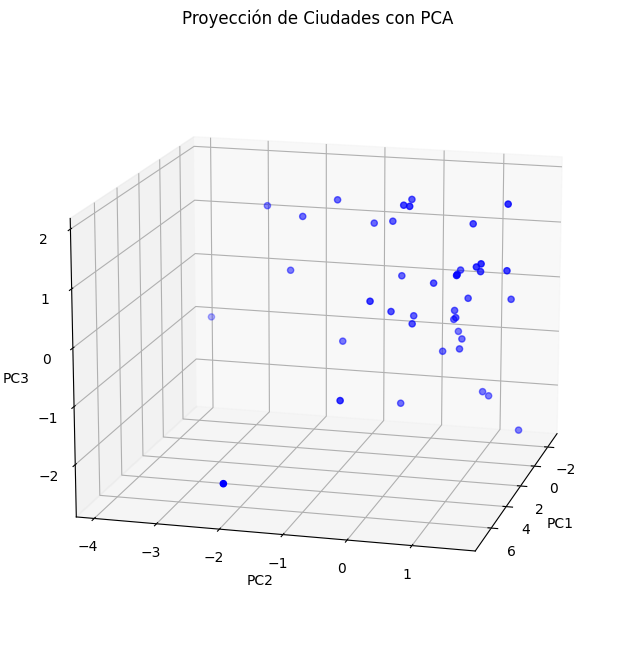

In [ ]:
# Crea un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data[0], projected_data[1], projected_data[2], c='b', marker='o')
ax.set_title('Proyección de Ciudades con PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(15, 15)
plt.show()

Es importante recordar que significa cada eje en esta gráfica:

1. **Eje X (PC1)**: Esta componente parece capturar la variabilidad relacionada con la contaminación (SO2), el número de empresas y la población. Dado que se relaciona positivamente con estas variables, los valores altos de PC1 podrían indicar áreas con alta contaminación, muchas empresas y una gran población. Por otro lado, se relaciona negativamente con la temperatura negativa (Neg.Temp), lo que significa que los valores altos de PC1 también podrían indicar áreas con temperaturas más cálidas.

2. **Eje Y (PC2)**: Esta componente parece capturar la variabilidad relacionada con el clima, ya que se relaciona positivamente con el nivel de precipitaciones y los días. Los valores altos de PC2 podrían indicar áreas con un clima más húmedo y posiblemente más días de lluvia. Además, tiene una pequeña relación negativa con el número de empresas y la población, lo que podría sugerir que las áreas con un clima más húmedo tienen menos empresas y una población más pequeña.

3. **Eje Z (PC3)**: Esta componente se relaciona muy negativamente con la temperatura negativa (Neg.Temp) y el nivel de precipitaciones. Esto significa que los valores altos de PC3 podrían indicar áreas con temperaturas más cálidas y menos lluvia.

Se procede a elegir los índices de las cuatro ciudades de forma aleatoria:

In [ ]:
# Establecer la semilla
random.seed(12345)

# Generar tres números aleatorios entre 0 y 100 (ambos inclusive)
indices_resaltados = [random.randint(0, data.shape[0]) for _ in range(4)]

color = ['r','g','y','k']

Representamos el mismo gráfico, pero resaltando las cuatro ciudades.

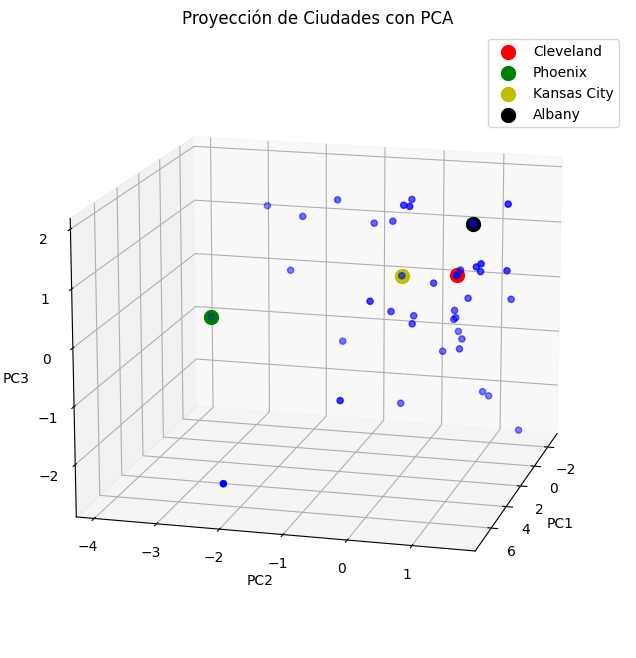

In [ ]:
# Crea un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data[0], projected_data[1], projected_data[2], c='b', marker='o')
ax.set_title('Proyección de Ciudades con PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(15, 15)

for j in [0,1,2,3]:
    i = indices_resaltados[j]
    ax.scatter(projected_data[0][i], projected_data[1][i], projected_data[2][i], c=color[j], marker='o', s=100, label=data['Ciudad'][i])

# Añadir leyenda
ax.legend()

plt.show()

Para poder ver mejor la diferencia entre las coordenadas de las cuatro ciudades se representa la gráfica utilizando tres vistas, donde cada una enfrenta dos componentes.

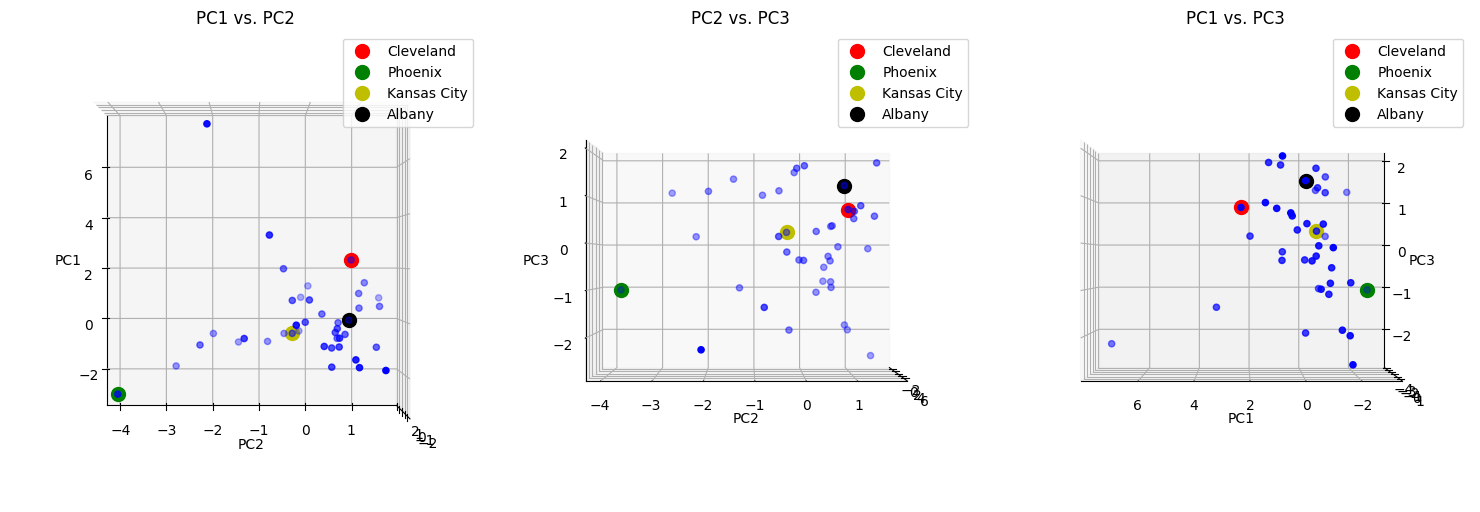

In [ ]:
# Crea un gráfico 3D con diferentes vistas
fig = plt.figure(figsize=(15, 10))

# Vista 1: PC1 con PC2
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(projected_data[0], projected_data[1], projected_data[2], c='b', marker='o')
ax1.set_title('PC1 vs. PC2')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
# Cambiar el ángulo de visualización (elevación, azimut)
ax1.view_init(-90, 0)

# Vista 2: PC2 con PC3
ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(projected_data[0], projected_data[1], projected_data[2], c='b', marker='o')
ax2.set_title('PC2 vs. PC3')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
# Cambiar el ángulo de visualización (elevación, azimut)
ax2.view_init(0, 0)

# Vista 3: PC2 con PC3
ax3 = fig.add_subplot(233, projection='3d')
ax3.scatter(projected_data[0], projected_data[1], projected_data[2], c='b', marker='o')
ax3.set_title('PC1 vs. PC3')
ax3.set_xlabel('PC1')
ax3.set_zlabel('PC3')
# Cambiar el ángulo de visualización (elevación, azimut)
ax3.view_init(0, 90)

# Resaltar las tres ciudades aleatorias
for j in [0,1,2,3]:
    i = indices_resaltados[j]
    ax1.scatter(projected_data[0][i], projected_data[1][i], projected_data[2][i], c=color[j], marker='o', s=100, label=data['Ciudad'][i])
    ax2.scatter(projected_data[0][i], projected_data[1][i], projected_data[2][i], c=color[j], marker='o', s=100, label=data['Ciudad'][i])
    ax3.scatter(projected_data[0][i], projected_data[1][i], projected_data[2][i], c=color[j], marker='o', s=100, label=data['Ciudad'][i])

# Añadir leyenda
ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()
plt.show()

En la gráfica se puede observar como de forma visual y sabiendo lo que expresa cada coordenda obtenemos una breve descripción de como es la ciudad. Por ejemplo, con las cuatro ciudades seleccionadas:

1. **Cleveland**: En la gráfica, Cleveland se ubica en la parte superior derecha del espacio tridimensional, indicando que tiene valores altos en todas las componentes principales. Esto sugiere que Cleveland podría tener un alto nivel de contaminación, un gran número de empresas y una gran población, además de temperaturas más cálidas y menos días de lluvia.

2. **Phoenix**: Phoenix, por otro lado, se ubica en la parte inferior izquierda del espacio tridimensional, indicando que tiene valores bajos en todas las componentes principales. Esto sugiere que Phoenix podría tener un bajo nivel de contaminación, pocas empresas y una pequeña población, además de temperaturas más frías y más días de lluvia.

3. **Kansas City**: Kansas City se ubica en una posición intermedia en la gráfica, con un valor bajo en la primera componente principal y valores altos en la segunda y tercera componentes principales. Esto sugiere que Kansas City podría tener un nivel medio de contaminación, un número medio de empresas y una población media, además de temperaturas más frías y un nivel medio de precipitaciones.

4. **Albany**: En la gráfica, Albany se ubica en una posición intermedia en la primera componente principal y en la parte superior para la segunda y tercera componentes principales. Esto sugiere que Albany podría tener un nivel medio de contaminación, un número medio de empresas y una población media. Sin embargo, a diferencia de Kansas City, Albany podría tener temperaturas más cálidas y más días de lluvia, dado su alto valor en la tercera componente principal.

Es importante tener en cuenta que estas interpretaciones están basadas en las componentes principales y los datos proporcionados, y podrían no reflejar completamente la realidad.

## 4.- (1 punto)
Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara los resultados y coméntalos

Comenzamos aplicando PCA a los datos escalados anterioremte. Además,

In [ ]:
pca = PCA(n_components=7)
pca.fit(df_scaled)

PCA(n_components=7)

In [ ]:
print(' -> Explained variance:')
explained_variance = pca.explained_variance_
print(explained_variance)

print(' -> Explained variance ratio:')
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

print(' -> Cumulative explained variance ratio:')
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)

 -> Explained variance:
[2.79632268 1.55014323 1.42984731 0.91429107 0.35544813 0.10279478
 0.0261528 ]
 -> Explained variance ratio:
[0.38973138 0.21604784 0.19928186 0.12742733 0.04953981 0.0143268
 0.00364499]
 -> Cumulative explained variance ratio:
[0.38973138 0.60577922 0.80506108 0.9324884  0.98202821 0.99635501
 1.        ]


In [ ]:
# Crear un DataFrame con los datos
df_pca = pd.DataFrame({
    'Componente': range(1, 8),
    'Autovalores': explained_variance,
    '% de varianza': explained_variance_ratio,
    '% acumulado': cumulative_explained_variance
})

# Configurar la columna 'Componente' como índice
df_pca.set_index('Componente', inplace=True)

# Ver el DataFrame
print(df_pca)

            Autovalores  % de varianza  % acumulado
Componente                                         
1              2.796323       0.389731     0.389731
2              1.550143       0.216048     0.605779
3              1.429847       0.199282     0.805061
4              0.914291       0.127427     0.932488
5              0.355448       0.049540     0.982028
6              0.102795       0.014327     0.996355
7              0.026153       0.003645     1.000000


Hasta ahora vemos que es exactamente igual.

Mostramos el mapa de calor que explicaba visualmente los autovalores.

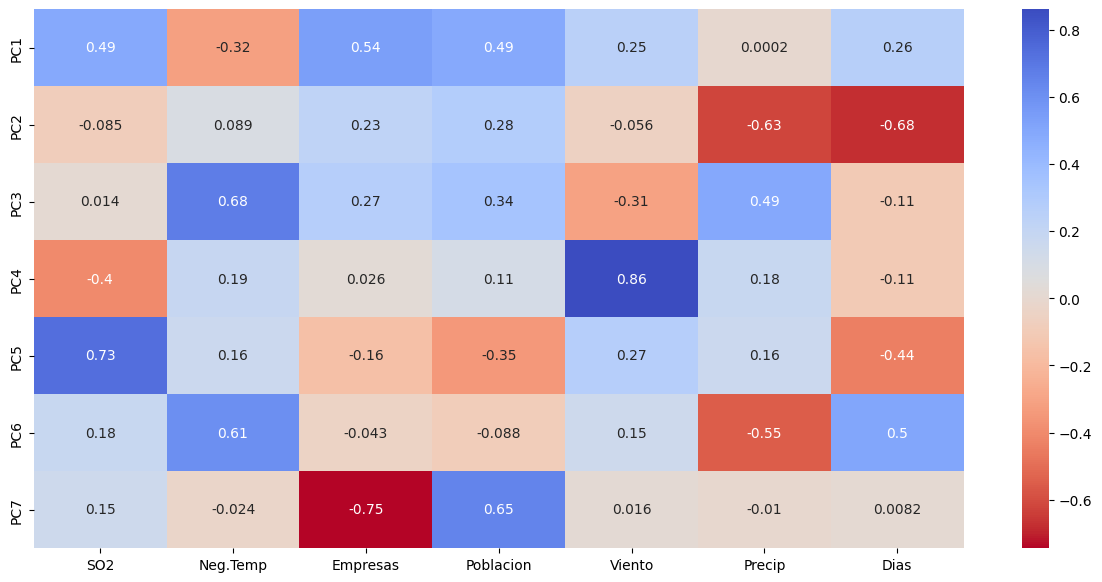

In [ ]:
components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7'], index=pca_columns).round(4)

# Visualiza los cos2 con un mapa de calor
plt.figure(figsize=(15, 7))  # Ajusta el tamaño de la figura aquí
sns.heatmap(components.T, annot=True, cmap='coolwarm_r')
plt.show()

El mapa de calor es exactamente igual que antes, aunque hay algunos vectores que son opuestos. En concreto las componetes: PC2, PC5, PC7.

Mostramos la variabilidad explicada de cada variable original por cada componente.

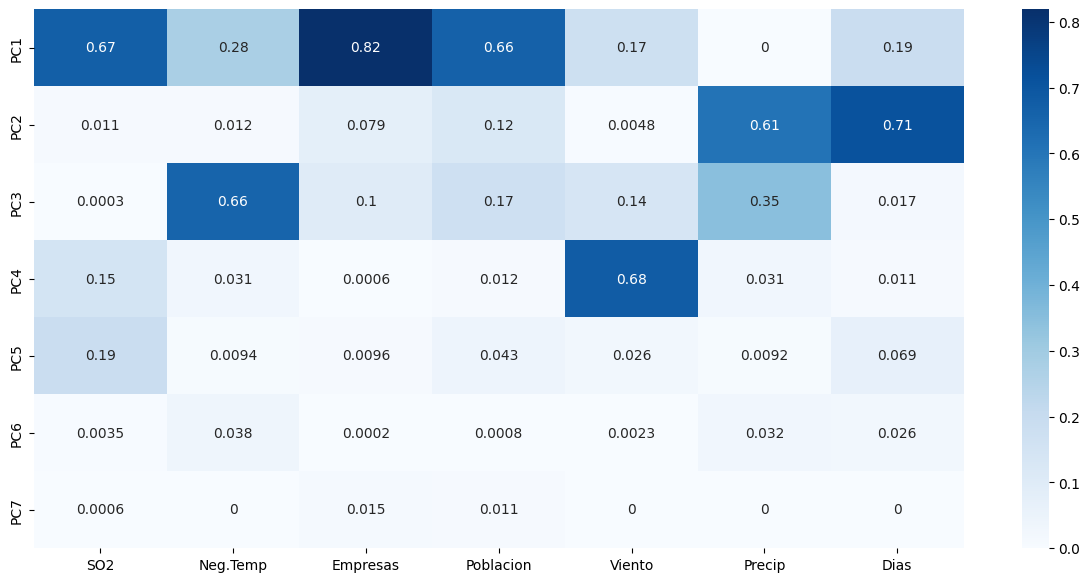

In [ ]:
# Asumiendo que 'pca' es tu modelo PCA ajustado y 'df_scaled' son tus datos estandarizados
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Calcula los cuadrados de las correlaciones (cos2) para las primeras 5 componentes principales
cos2 = loadings**2
cos2_df = pd.DataFrame(cos2[:, :7], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=pca_columns).round(4)

# Visualiza los cos2 con un mapa de calor
plt.figure(figsize=(15, 7))  # Ajusta el tamaño de la figura aquí
sns.heatmap(cos2_df.T, annot=True, cmap='Blues')
plt.show()

En este caso, como esta segunda gráfica no tiene en cuenta el signo vemos que se obtiene exactamente el mismo que antes.

Ahora obtenemos las coordenadas de cada ciudad en las componentes principales utilizando una función de la librería.

In [ ]:
X_pca = pca.transform(df_scaled)

Volvemos a representar las ciudades sabiendo que el eje Y (PC2) tiene el signo contrario:

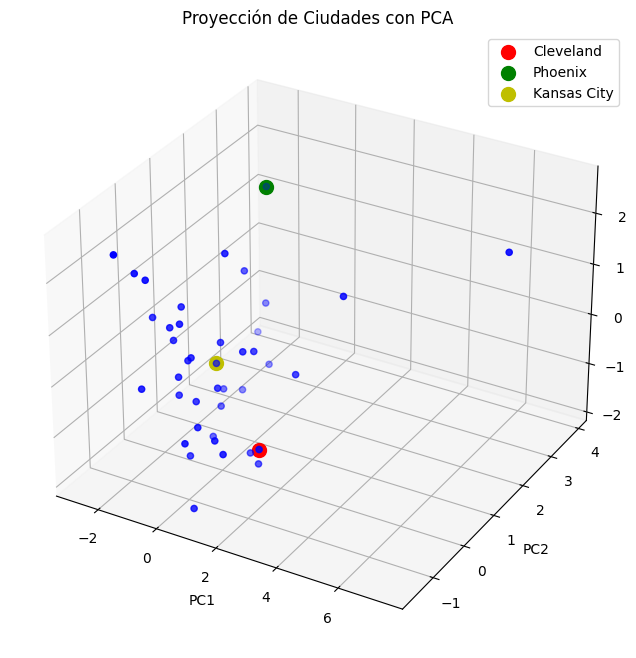

In [ ]:
# Crea un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c='b', marker='o')
ax.set_title('Proyección de Ciudades con PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

for j in [0,1,2]:
    i = indices_resaltados[j]
    ax.scatter(X_pca[i,0], X_pca[i,1], X_pca[i,2], c=color[j], marker='o', s=100, label=data['Ciudad'][i])

# Añadir leyenda
ax.legend()

plt.show()

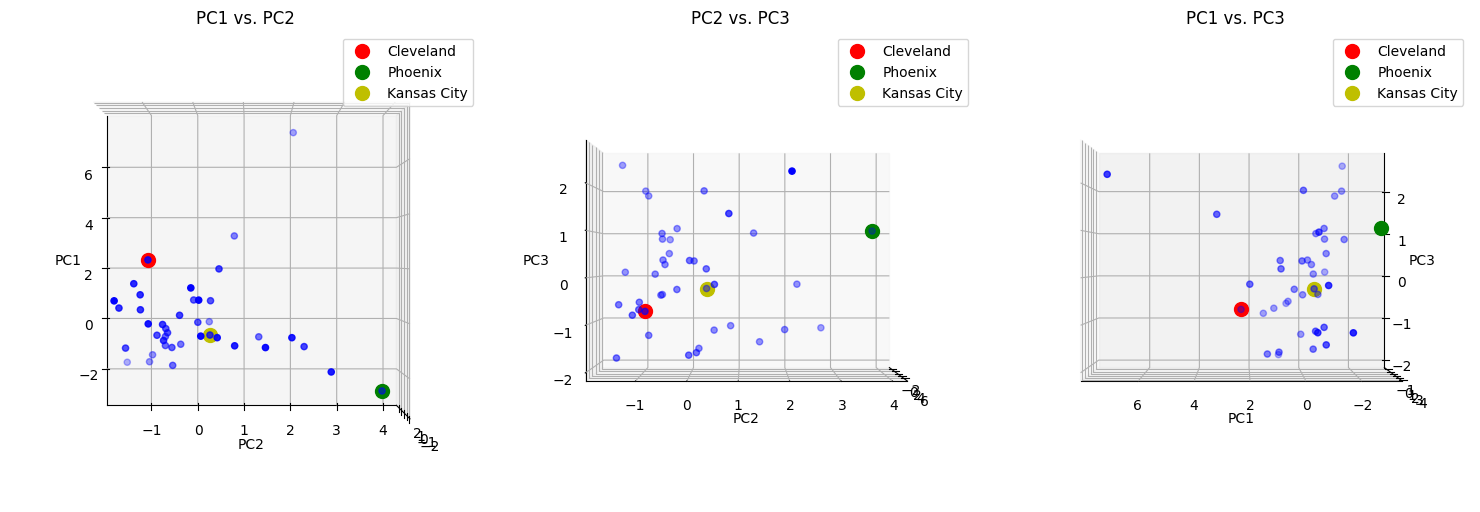

In [ ]:
# Crea un gráfico 3D con diferentes vistas
fig = plt.figure(figsize=(15, 10))

# Vista 1: PC1 con PC2
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c='b', marker='o')
ax1.set_title('PC1 vs. PC2')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
# Cambiar el ángulo de visualización (elevación, azimut)
ax1.view_init(-90, 0)

# Vista 2: PC2 con PC3
ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c='b', marker='o')
ax2.set_title('PC2 vs. PC3')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
# Cambiar el ángulo de visualización (elevación, azimut)
ax2.view_init(0, 0)

# Vista 3: PC2 con PC3
ax3 = fig.add_subplot(233, projection='3d')
ax3.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c='b', marker='o')
ax3.set_title('PC1 vs. PC3')
ax3.set_xlabel('PC1')
ax3.set_zlabel('PC3')
# Cambiar el ángulo de visualización (elevación, azimut)
ax3.view_init(0, 90)

# Resaltar las tres ciudades aleatorias
for j in [0,1,2]:
    i = indices_resaltados[j]
    ax1.scatter(X_pca[i,0], X_pca[i,1], X_pca[i,2], c=color[j], marker='o', s=100, label=data['Ciudad'][i])
    ax2.scatter(X_pca[i,0], X_pca[i,1], X_pca[i,2], c=color[j], marker='o', s=100, label=data['Ciudad'][i])
    ax3.scatter(X_pca[i,0], X_pca[i,1], X_pca[i,2], c=color[j], marker='o', s=100, label=data['Ciudad'][i])

# Añadir leyenda
ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()
plt.show()

Efectivamente estas gráficas son iguales, exceptuando esa diferencia en el sentido del eje de la segunda componente principal. Por lo que todo lo obtenido en los apartados 1, 2 y 3 estaba bien calculado.